<center>

# **_Funding Forecast: Leveraging Machine Learning and Time Series Analysis for Predictive Insights in Startup Investments_**

</center>

## _Abstract_

This project aims to analyze and forecast the total funding amounts of startups using various regression and time series modeling techniques. Initially, we preprocess the dataset, which includes features such as funding amounts, company size, and number of funding rounds. The data is then scaled and split into training and testing sets.

We apply multiple regression models, including Linear Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Random Forest Regression, and Gradient Boosting Regression. Each model is evaluated based on R-squared and Mean Squared Error (MSE) metrics to determine its predictive performance. The Gradient Boosting Regression model, which demonstrates the highest R-squared and lowest MSE, is selected as the best model for prediction.

To capture temporal trends, we convert the data to a yearly frequency and fit both ARIMA and SARIMAX models to forecast future funding amounts. However, the SARIMAX model faces convergence issues and instability. The final model selection emphasizes Gradient Boosting Regression due to its superior performance in predicting funding amounts.

This project provides insights into the effectiveness of different machine learning models in predicting funding trends and highlights the importance of robust model selection and validation in financial forecasting.

## _Introduction_

This project utilizes a comprehensive dataset that captures various aspects of startup funding dynamics. The dataset comprises several key features, including 'Organization Name', 'Founded Date', 'Number of Employees', 'Total Funding Amount', and 'Last Funding Amount', among others. The data spans multiple years and includes funding details in different currencies, providing a detailed view of financial inflows into startups.

**Objective:**  
The primary objective of this project is to analyze and forecast the total funding amounts for startups, leveraging a range of regression and time series models. This involves understanding the historical funding patterns and predicting future trends based on the available data.

**Key Context:**  
The dataset’s extensive historical records offer insights into funding trends over time, allowing for the evaluation of various predictive models. The analysis includes preprocessing the data to handle missing values and date formatting, feature engineering to enhance predictive power, and the application of sophisticated regression models to estimate funding amounts.

**Goals:**
- To preprocess and clean the dataset for analysis.
- To evaluate the performance of different regression models.
- To select the best-performing model based on evaluation metrics.
- To apply time series forecasting techniques to predict future funding trends.

**Business Impact:**
- **Enhanced Decision-Making:** Accurate funding forecasts can help investors and stakeholders make informed decisions regarding future investments.
- **Strategic Planning:** Startups can leverage funding predictions to plan their growth strategies and resource allocation effectively.
- **Market Insights:** Understanding funding trends provides valuable insights into market dynamics and investor behavior.

### Step-by-Step Approach

1. **Data Collection and Acquisition**
   - Gather dataset and understand its structure
   - Verify data source credibility

2. **Data Preprocessing**
   - Handle missing values and inconsistencies
   - Convert data types (e.g., date parsing)
   - Feature engineering and scaling

3. **Exploratory Data Analysis (EDA)**
   - Analyze data distributions and summary statistics
   - Visualize key features and relationships
   - Identify patterns and outliers

4. **Feature Selection and Engineering**
   - Identify relevant features for modeling
   - Create new features to enhance predictive power

5. **Model Creation and Training**
   - Implement and train different regression models (Linear, Ridge, Lasso, Elastic Net, Random Forest, Gradient Boosting)

6. **Model Evaluation & Selection**
   - Assess model performance using metrics like R-squared and Mean Squared Error (MSE)
   - Compare and select the best-performing model

7. **Time Series Analysis and Forecasting**
   - Apply ARIMA and SARIMA models for time series forecasting
   - Evaluate model fit and forecast accuracy

8. **Results Interpretation and Analysis**
   - Interpret model results and forecasts
   - Analyze the impact of findings on the startup funding landscape

9. **Conclusion**
   - Summary of potential prediction using Regression & Correlation analysis
    
10. **Business Implications and Recommendations**
   - Provide actionable insights for stakeholders
   - Offer recommendations based on the analysis

## _Data Collection & Acquisition_

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/Ansuman21/HPTV/main/dataset.xlsx%20-%2020150101.csv"
df = pd.read_csv(url)

# Display all the columns of the dataset
df.head().T

/var/folders/mm/vz2421rs2zs_sp9_ywkmcr8w0000gn/T/ipykernel_68395/4251190189.py:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


0  \
Organization Name                                                                   Nexar   
Organization Name URL                     https://www.crunchbase.com/organization/nexar-2   
Headquarters Location                                          Tel Aviv, Tel Aviv, Israel   
Industries                              Apps, Autonomous Vehicles, Internet, Sensor, T...   
Last Funding Type                                                                Series C   
Last Funding Date                                                               4/30/2020   
Last Funding Amount                                                            52000000.0   
Last Funding Amount Currency                                                          USD   
Last Funding Amount Currency (in USD)                                          52000000.0   
Number of Employees                                                               101-250   
Total Funding Amount                                                           96500000.0   
Total Funding Amount Currency                                                         USD   
Total Funding Amount Currency (in USD)                                         96500000.0   
Number of Funding Rounds                                                              4.0   
Acquisition Status                                                                    NaN   
Acquired by                                                                           NaN   
Acquired by URL                                                                       NaN   
Number of Acquisitions                                                                NaN   
Acquisition Price Currency (in USD)                                                   NaN   
Number of Founders                                                                    2.0   
Unnamed: 20                                                                           NaN   
Acquisition Price                                                                     NaN   
Price Currency                                                                        NaN   
Company Type                                                                   For Profit   
Founded Date                                                                     1/1/2015   
Twitter                                                       http://twitter.com/getnexar   
Facebook                                                    https://facebook.com/getnexar   
LinkedIn                                        https://www.linkedin.com/company/10460529   
Funding Status                                                         Late Stage Venture   
Acquisition Type                                                                      NaN   
Announced Date                                                                        NaN   
Estimated Revenue Range                                                     Less than $1M   

                                                                                        1  \
Organization Name                                                                 Medable   
Organization Name URL                   https://www.crunchbase.com/organization/medabl...   
Headquarters Location                                Palo Alto, California, United States   
Industries                              Developer APIs, Health Care, Medical, Medical ...   
Last Funding Type                                                Venture - Series Unknown   
Last Funding Date                                                                5/4/2020   
Last Funding Amount                                                            25000000.0   
Last Funding Amount Currency                                                          USD   
Last Funding Amount Currency (in USD)                                          25000000.0   
Number of Employees                                                               101-25

### Inference

Upon loading the dataset from the provided URL, it was observed that the dataset contained various columns related to startup funding and organizational details. The initial rows of the dataset revealed information such as the organization's name, URL, headquarters location, industries, funding details, and social media links. This dataset likely aimed to provide insights into startup funding trends and organizational characteristics.

## _Data Validation_

In [3]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Organization Name                       21528 non-null  object 
 1   Organization Name URL                   21528 non-null  object 
 2   Headquarters Location                   19548 non-null  object 
 3   Industries                              21360 non-null  object 
 4   Last Funding Type                       12473 non-null  object 
 5   Last Funding Date                       12473 non-null  object 
 6   Last Funding Amount                     9924 non-null   float64
 7   Last Funding Amount Currency            9924 non-null   object 
 8   Last Funding Amount Currency (in USD)   9924 non-null   float64
 9   Number of Employees                     19980 non-null  object 
 10  Total Funding Amount                    11038 non-null  fl

### Inference

The dataset comprised 21,528 entries and 32 columns, covering a range of attributes related to startups, including organizational details, funding information, and acquisition data. The columns included information such as the organization’s name, headquarters location, industries, funding types, and social media links. Several columns had missing values, particularly those related to acquisition details and some funding metrics. Notably, the Unnamed: 20 column contained no data and was likely an artifact from data processing. The data types varied, with most columns being of object type and several containing numerical values. The dataset provided a comprehensive view of startup funding and acquisition status but required cleaning and preprocessing to address missing values and inconsistencies.

In [4]:
# Check for missing values
df.isnull().sum()

Organization Name                             0
Organization Name URL                         0
Headquarters Location                      1980
Industries                                  168
Last Funding Type                          9055
Last Funding Date                          9055
Last Funding Amount                       11604
Last Funding Amount Currency              11604
Last Funding Amount Currency (in USD)     11604
Number of Employees                        1548
Total Funding Amount                      10490
Total Funding Amount Currency             10490
Total Funding Amount Currency (in USD)    10490
Number of Funding Rounds                   9055
Acquisition Status                        20462
Acquired by                               21164
Acquired by URL                           21164
Number of Acquisitions                    20796
Acquisition Price Currency (in USD)       21475
Number of Founders                         5409
Unnamed: 20                             

### Inference

The analysis of missing values revealed significant gaps across several columns in the dataset. The `Acquisition Status`, `Acquired by`, and `Acquired by URL` columns had the highest number of missing entries, with many fields remaining unfilled. Similarly, columns related to funding amounts and acquisition details, such as `Last Funding Amount`, `Total Funding Amount`, and `Acquisition Price`, also exhibited substantial missing data. The `Unnamed: 20` column was entirely empty and thus redundant. Additionally, social media-related columns like `Twitter`, `Facebook`, and `LinkedIn` had notable missing values, indicating incomplete information on company presence across these platforms. The dataset required extensive cleaning and imputation to address these gaps and ensure data completeness for analysis.

In [5]:
# Calculate the percentage of missing values
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
Unnamed: 20                               100.000000
Price Currency                             99.753809
Acquisition Price                          99.753809
Acquisition Price Currency (in USD)        99.753809
Acquisition Type                           98.355630
Acquired by URL                            98.309179
Acquired by                                98.309179
Announced Date                             98.309179
Number of Acquisitions                     96.599777
Acquisition Status                         95.048309
Last Funding Amount Currency (in USD)      53.901895
Last Funding Amount Currency               53.901895
Last Funding Amount                        53.901895
Funding Status                             53.832219
Total Funding Amount                       48.727239
Total Funding Amount Currency (in USD)     48.727239
Total Funding Amount Currency              48.727239
Last Funding Type                          42.061501
N

### Inference

- The `Unnamed: 20` column was entirely empty, contributing to 100% missing values.
- Columns related to acquisition details, including `Price Currency`, `Acquisition Price`, and `Acquisition Type`, had extremely high missing values, over 98%.
- Significant gaps were noted in `Acquired by URL` and `Acquisition Status`, both with around 95% missing data.
- Funding-related columns, such as `Last Funding Amount` and `Total Funding Amount`, had over 48% missing values.
- Social media columns like `Facebook`, `LinkedIn`, and `Twitter` had notable missing values, ranging from 22% to 25%.
- `Headquarters Location` and `Number of Employees` had lower missing values compared to other columns, with around 9% and 7%, respectively.
- The dataset's completeness varied widely across different columns, indicating the need for targeted data cleaning and imputation efforts.

In [6]:
# Get a statistical summary of numerical columns
df.describe()

Last Funding Amount  Last Funding Amount Currency (in USD)  \
count         9.924000e+03                           9.924000e+03   
mean          3.443762e+07                           1.218798e+07   
std           5.335483e+08                           4.751057e+07   
min           1.000000e+03                           1.000000e+03   
25%           7.500000e+05                           6.874405e+05   
50%           2.885677e+06                           2.509196e+06   
75%           1.000000e+07                           9.106738e+06   
max           3.000000e+10                           2.600000e+09   

       Total Funding Amount  Total Funding Amount Currency (in USD)  \
count          1.103800e+04                            1.103800e+04   
mean           3.664472e+07                            1.967612e+07   
std            5.042569e+08                            9.479053e+07   
min            1.000000e+03                            1.000000e+03   
25%            1.000000e+06                            9.700000e+05   
50%            3.500000e+06                            3.307082e+06   
75%            1.255587e+07                            1.200000e+07   
max            3.000000e+10                            4.100000e+09   

       Number of Funding Rounds  Acquisition Price Currency (in USD)  \
count              12473.000000                         5.300000e+01   
mean                   2.309549                         3.949920e+08   
std                    1.479869                         7.533893e+08   
min                    1.000000                         1.440760e+06   
25%                    1.000000                         3.006000e+07   
50%                    2.000000                         1.700000e+08   
75%                    3.000000                         4.500000e+08   
max                   14.000000                         4.900000e+09   

       Number of Founders  Unnamed: 20  Acquisition Price  
count        16119.000000          0.0       5.300000e+01  
mean             1.997829          NaN       3.967445e+08  
std              1.050792          NaN       7.525737e+08  
min              0.000000          NaN       1.480000e+06  
25%              1.000000          NaN       3.770000e+07  
50%              2.000000          NaN       1.700000e+08  
75%              3.000000          NaN       4.500000e+08  
max             10.000000          NaN       4.900000e+09

### Inference

- **Funding Amounts**: The `Last Funding Amount` and `Total Funding Amount` varied widely, with a mean of approximately $34.4$ million and $36.6$ million, respectively. Their maximum values reached up to $30 billion.

- **Funding Rounds**: The average number of funding rounds was about 2.31, with a minimum of 1 and a maximum of 14.

- **Acquisition Price**: The `Acquisition Price` had a mean of approximately $396.7 million, but this statistic was only available for a small subset of the data due to high missing values.

- **Number of Founders**: The average number of founders was approximately 2.00, with values ranging from 0 to 10.
- **Currency Values**: Values in USD for `Last Funding Amount Currency` and `Total Funding Amount Currency` had high means and standard deviations, indicating substantial variability in the amounts recorded.

Overall, the data exhibited significant variability in funding and acquisition values, with many columns having high standard deviations relative to their means.

In [7]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count

0

### Inference

The dataset did not contain any duplicate rows.

## _Data Preprocessing_

### Drop Unnecessary Columns

In [8]:
# List of columns to drop
columns_to_drop = missing_percentage[missing_percentage > 90].index.tolist()

# Drop columns with more than 90% missing values
df_cleaned = df.drop(columns=columns_to_drop)

print("DataFrame after dropping columns with more than 90% missing values:")
df_cleaned.info()

DataFrame after dropping columns with more than 90% missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21528 entries, 0 to 21527
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Organization Name                       21528 non-null  object 
 1   Organization Name URL                   21528 non-null  object 
 2   Headquarters Location                   19548 non-null  object 
 3   Industries                              21360 non-null  object 
 4   Last Funding Type                       12473 non-null  object 
 5   Last Funding Date                       12473 non-null  object 
 6   Last Funding Amount                     9924 non-null   float64
 7   Last Funding Amount Currency            9924 non-null   object 
 8   Last Funding Amount Currency (in USD)   9924 non-null   float64
 9   Number of Employees                     19980 non-null  obj

### Inference

- **Dropped Columns**: Columns with more than 90% missing values were removed.
- **Remaining Columns**: The dataset retained 22 columns after this operation.

### Impute missing values

In [9]:
# Fill missing values for social media columns
df_cleaned['Twitter'].fillna('No Account', inplace=True)
df_cleaned['Facebook'].fillna('No Account', inplace=True)
df_cleaned['LinkedIn'].fillna('No Account', inplace=True)

print("DataFrame after filling missing values in social media columns:")
df_cleaned[['Twitter', 'Facebook', 'LinkedIn']].head()

DataFrame after filling missing values in social media columns:


Twitter                              Facebook  \
0    http://twitter.com/getnexar         https://facebook.com/getnexar   
1  http://twitter.com/MedableInc  https://www.facebook.com/MedableInc/   
2                     No Account  https://www.facebook.com/instabox.se   
3    https://twitter.com/triller  https://www.facebook.com/trillervids   
4  https://twitter.com/opskinsgo      https://www.facebook.com/opskins   

                                            LinkedIn  
0          https://www.linkedin.com/company/10460529  
1     https://www.linkedin.com/company/medable-inc-/  
2      https://www.linkedin.com/company/instabox-ab/  
3           https://www.linkedin.com/company/triller  
4  https://www.linkedin.com/company/opskins-com--...

### Inference

- **Social Media Accounts**: Missing values in Twitter, Facebook, and LinkedIn columns were filled.
- **Updated Entries**: The updated DataFrame now contains complete social media URLs or the placeholder "No Account" where applicable.

In [10]:
# Fill missing values for 'Number of Employees'
df_cleaned['Number of Employees'].fillna(df_cleaned['Number of Employees'].mode()[0], inplace=True)

print("DataFrame after filling missing values in 'Number of Employees':")
df_cleaned['Number of Employees'].value_counts()

DataFrame after filling missing values in 'Number of Employees':


1-10           10970
11-50           8118
51-100          1273
101-250          821
251-500          189
501-1000          87
1001-5000         51
10001+            12
5001-10000         6
1,001-5,000        1
Name: Number of Employees, dtype: int64

### Inference

- **Employee Ranges**: The 'Number of Employees' column was filled with categorized employee ranges.
- **Distribution**: The majority of entries fall into the "1-10" category (10,970), followed by "11-50" (8,118). Fewer entries are in higher ranges, with only a few companies in the "10001+" category.

In [11]:
# Fill missing values for funding amounts
df_cleaned['Last Funding Amount'].fillna(df_cleaned['Last Funding Amount'].median(), inplace=True)
df_cleaned['Total Funding Amount'].fillna(df_cleaned['Total Funding Amount'].median(), inplace=True)

print("DataFrame after filling missing values in funding amounts:")
df_cleaned[['Last Funding Amount', 'Total Funding Amount']].describe()

DataFrame after filling missing values in funding amounts:


Last Funding Amount  Total Funding Amount
count         2.152800e+04          2.152800e+04
mean          1.743052e+07          2.049422e+07
std           3.625872e+08          3.614451e+08
min           1.000000e+03          1.000000e+03
25%           2.885677e+06          3.202813e+06
50%           2.885677e+06          3.500000e+06
75%           2.885677e+06          3.750000e+06
max           3.000000e+10          3.000000e+10

### Inference

- **Funding Amounts**: Missing values in the 'Last Funding Amount' and 'Total Funding Amount' columns were filled.
- **Summary Statistics**: The mean funding amounts were 17,430,520 dollars for 'Last Funding Amount' and 20,494,220 dollars for 'Total Funding Amount'. The standard deviations were high, indicating significant variability.
- **Range**: The minimum values were 1,000 dollars for both columns, and the maximum values reached up to 30 billion dollars. The interquartile range (25th to 75th percentile) showed a substantial spread in funding amounts.

In [12]:
# Fill missing values for categorical columns
df_cleaned['Headquarters Location'].fillna('Unknown', inplace=True)
df_cleaned['Industries'].fillna('Unknown', inplace=True)

print("DataFrame after filling missing values in categorical columns:")
df_cleaned[['Headquarters Location', 'Industries']].head()

DataFrame after filling missing values in categorical columns:


Headquarters Location  \
0               Tel Aviv, Tel Aviv, Israel   
1     Palo Alto, California, United States   
2       HÃ¤gersten, Stockholms Lan, Sweden   
3        New York, New York, United States   
4  Santa Monica, California, United States   

                                          Industries  
0  Apps, Autonomous Vehicles, Internet, Sensor, T...  
1  Developer APIs, Health Care, Medical, Medical ...  
2       Logistics, Shipping, Supply Chain Management  
3               Digital Media, Music, Social Network  
4                       E-Commerce, Gaming, Internet

### Inference

- **Categorical Data**: Missing values in the `Headquarters Location` and `Industries` columns were filled.
- **Headquarters Location**: The filled data included locations such as Tel Aviv, Palo Alto, Hägersten, New York, and Santa Monica.
- **Industries**: The filled data included industry categories like Apps, Autonomous Vehicles, Digital Media, E-Commerce, and others.

### Trim unwanted spaces

In [13]:
# Define the column to clean
column_to_clean = 'Organization Name'

# List of substrings to replace, ordered from longest to shortest
substrings_to_replace = [" , Inc.", " Inc.", " Inc"]

# Apply find-and-replace operations
for substring in substrings_to_replace:
    df[column_to_clean] = df[column_to_clean].str.replace(substring, '', regex=False)

# Print the first few rows of the cleaned DataFrame to verify changes
print("DataFrame after find-and-replace operations:")
df[column_to_clean].head()

DataFrame after find-and-replace operations:


0       Nexar
1     Medable
2    Instabox
3     Triller
4     OPSkins
Name: Organization Name, dtype: object

### Inference

- **Data Cleaning**: The `Organization Name` column underwent a series of find-and-replace operations.
- **Replacements**: Substrings such as " , Inc.", " Inc.", and " Inc" were removed.
- **Result**: The cleaned column displayed organization names like Nexar, Medable, Instabox, Triller, and OPSkins.

## _Exploratory Data Analysis_

### _Numerical Variables Analysis_

#### Distribution of Funding Amounts

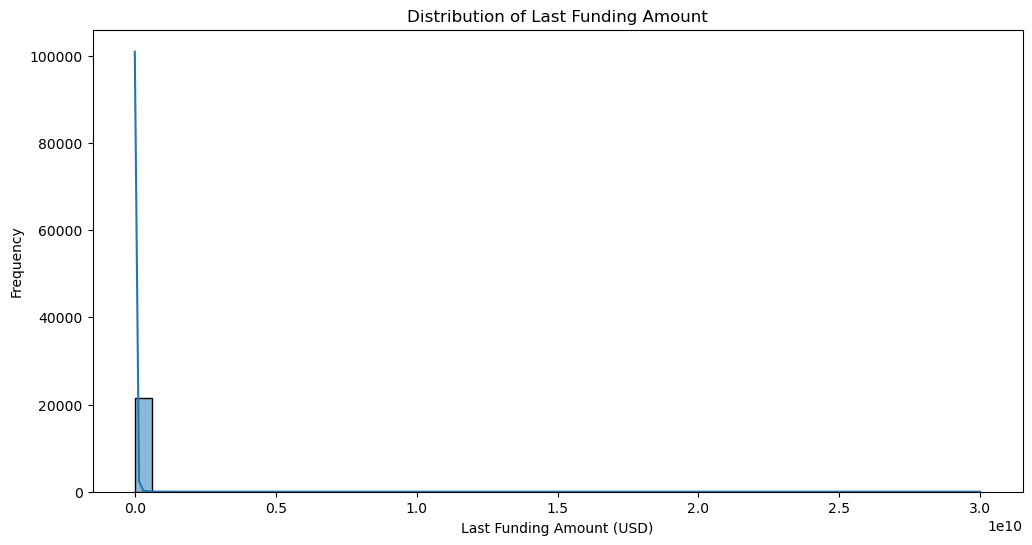

In [14]:
# Plot the distribution of 'Last Funding Amount'
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Last Funding Amount'], bins=50, kde=True)
plt.title('Distribution of Last Funding Amount')
plt.xlabel('Last Funding Amount (USD)')
plt.ylabel('Frequency')
plt.show()

### Inference

* The graph suggests that the vast majority of last funding amounts were relatively small, likely under $10$ million.
* A very small number of entities received substantial funding, possibly exceeding $100$ million.
* The distribution was highly skewed to the right, indicating a concentration of lower funding amounts.
* There were few instances of funding amounts falling between $10$ million and $100 million.

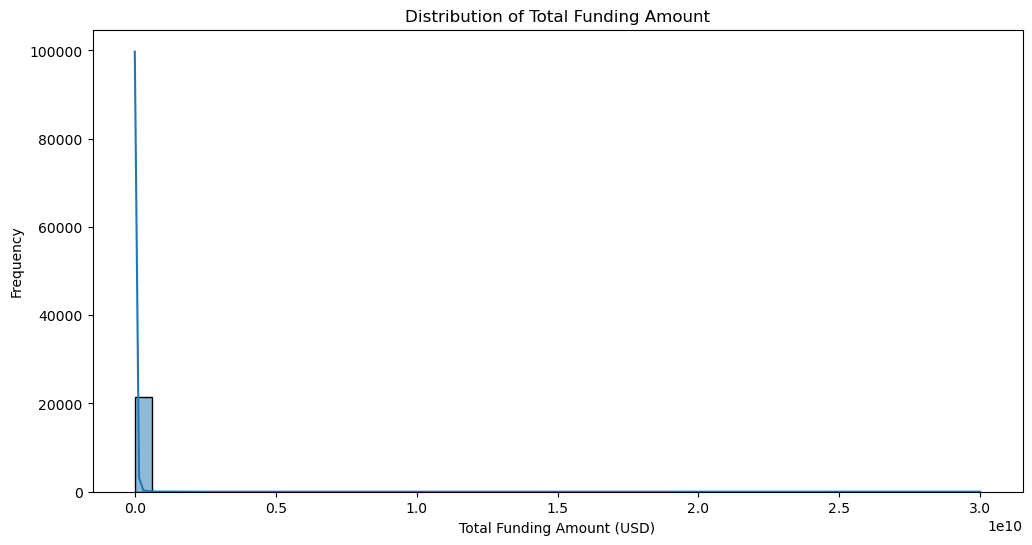

In [15]:
# Plot the distribution of 'Total Funding Amount'
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Total Funding Amount'], bins=50, kde=True)
plt.title('Distribution of Total Funding Amount')
plt.xlabel('Total Funding Amount (USD)')
plt.ylabel('Frequency')
plt.show()

### Inference

Based on the graph, it appears that the distribution of total funding amounts was heavily skewed towards lower amounts. A large majority of the funding amounts fell below $100$ million, with a significant concentration around the $0 - $10 million range. This is indicated by the tall bar at the left end of the graph and the rapid decline in frequency as the funding amount increased. There were very few instances of funding amounts exceeding $200 million.

#### Funding Status Distribution

In [16]:
# Pie chart of funding status distribution
fig = px.pie(df_cleaned, names='Funding Status', title='Distribution of Funding Status')
fig.update_traces(textinfo='percent+label')
fig.show()

### Inference

* The majority of companies analyzed had secured seed funding, accounting for approximately 27.3% of the total.
* Early-stage ventures represented the second-largest group, comprising around 14.5% of the companies.
* A significant proportion, 53.8%, fell into the "null" category, indicating missing or unspecified funding status.
* M&A activity was relatively low, with only 1.69% of companies having been acquired.
* Late-stage venture funding and IPOs were even less frequent, with 1.2% and 0.701% respectively.
* Private equity investments were the least common, representing only 0.465% of the companies.

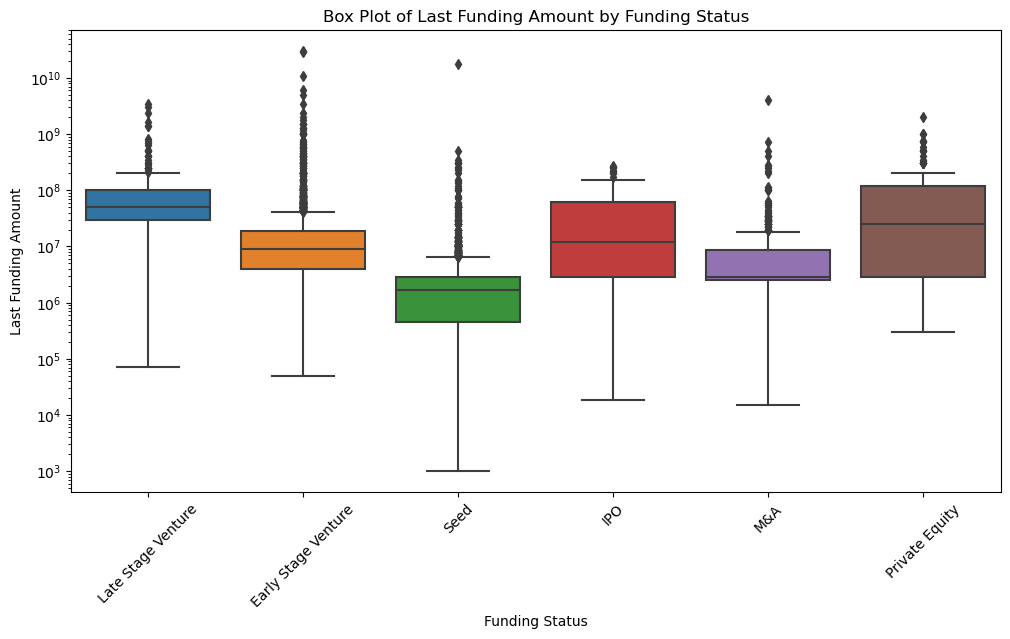

In [17]:
plt.figure(figsize=(12, 6))

# Box plot of Last Funding Amount by Funding Status
sns.boxplot(x='Funding Status', y='Last Funding Amount', data=df_cleaned)
plt.title('Box Plot of Last Funding Amount by Funding Status')
plt.xticks(rotation=45)
plt.yscale('log') 

plt.show()

### Inference

**Distribution of Funding Amounts:**

* Companies that received late-stage venture funding had the highest median funding amount, around $10^8$ dollars.
* Early-stage ventures received a median funding amount of approximately $10^6$ dollars, significantly lower than late-stage ventures.
* Seed-funded companies had a median funding amount around $10^5$ dollars, further emphasizing the decreasing funding trend with earlier stages.
* IPOs and M&A deals tended to have higher funding amounts compared to the other stages, with medians ranging from $10^7$ to $10^8$ dollars.
* Private equity investments showed a wide range of funding amounts, with a median around $10^6$ dollars.

**Variation in Funding Amounts:**

* Late-stage venture funding exhibited the highest variability in funding amounts, as indicated by the box plot's size and the presence of outliers.
* Seed-funded companies had the least variability in funding amounts, with a relatively narrow box plot.
* Early-stage ventures, IPOs, M&As, and private equity investments showed moderate levels of variability in funding amounts.

**Overall, the graph suggests a clear trend of decreasing median funding amounts from late-stage ventures to seed-funded companies. Additionally, the variability in funding amounts differed across the various funding stages.**

### _Categorical Variables Analysis_

#### Distribution of Funding types

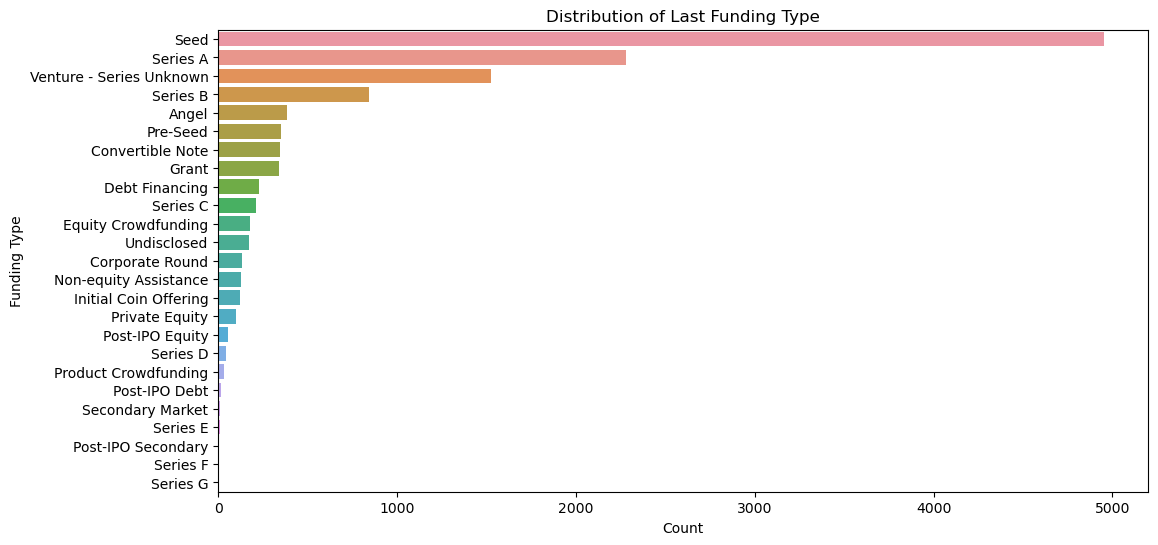

In [18]:
# Plot the distribution of 'Last Funding Type'
plt.figure(figsize=(12, 6))
sns.countplot(y='Last Funding Type', data=df_cleaned, order=df_cleaned['Last Funding Type'].value_counts().index)
plt.title('Distribution of Last Funding Type')
plt.xlabel('Count')
plt.ylabel('Funding Type')
plt.show()

### Inference

* Seed funding was the most common type of last funding, accounting for approximately 4,500 instances.
* Series A funding was the second most common, with around 2,000 instances.
* Venture-Series Unknown represented a substantial portion of the data, with approximately 1,500 instances.
* Series B, Pre-Seed, and Angel funding types each had between 500 and 1,000 instances.
* The remaining funding types (Convertible Note, Grant, Debt Financing, Series C, Equity Crowdfunding, Undisclosed, Corporate Round, Non-equity Assistance, Initial Coin Offering, Private Equity, Post-IPO Equity, Product Crowdfunding, Series D, Post-IPO Debt, Secondary Market, Series E, Post-IPO Secondary, Series F, Series G) had significantly fewer instances, generally under 500 each.

**Overall, the graph indicates a heavy concentration of funding in the early stages (Seed, Series A, Venture-Series Unknown), with a decreasing frequency of later-stage funding types.**

#### Distribution of Company Types

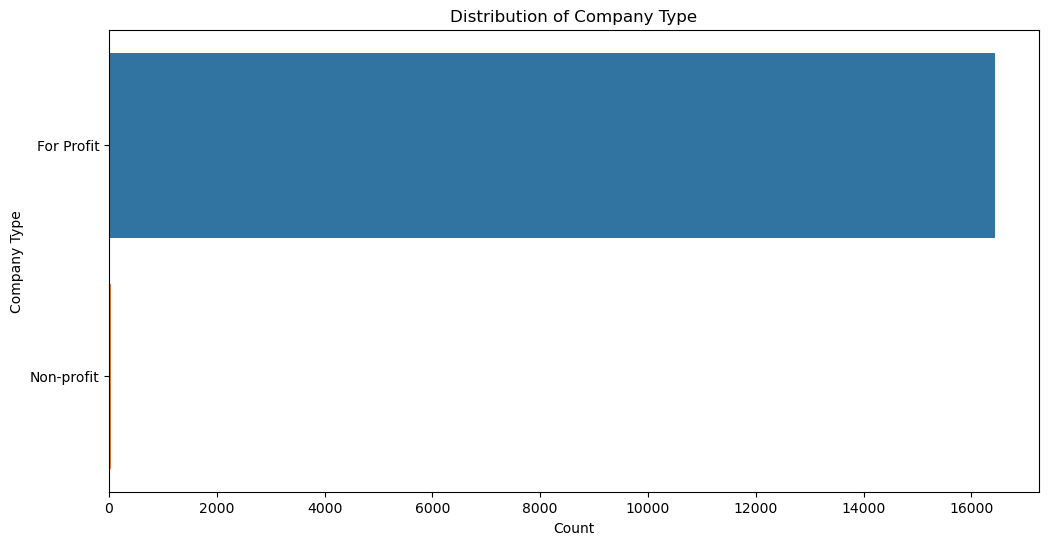

In [19]:
# Plot the distribution of 'Company Type'
plt.figure(figsize=(12, 6))
sns.countplot(y='Company Type', data=df_cleaned, order=df_cleaned['Company Type'].value_counts().index)
plt.title('Distribution of Company Type')
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.show()

### Inference

* The graph shows a significant predominance of for-profit companies in the dataset. 
* Approximately 16,000 companies were identified as for-profit entities.
* Non-profit organizations were represented by a negligible count, likely less than 100 based on the graph's scale.

## _Temporal Analysis_

#### Number of Funding Rounds over Time

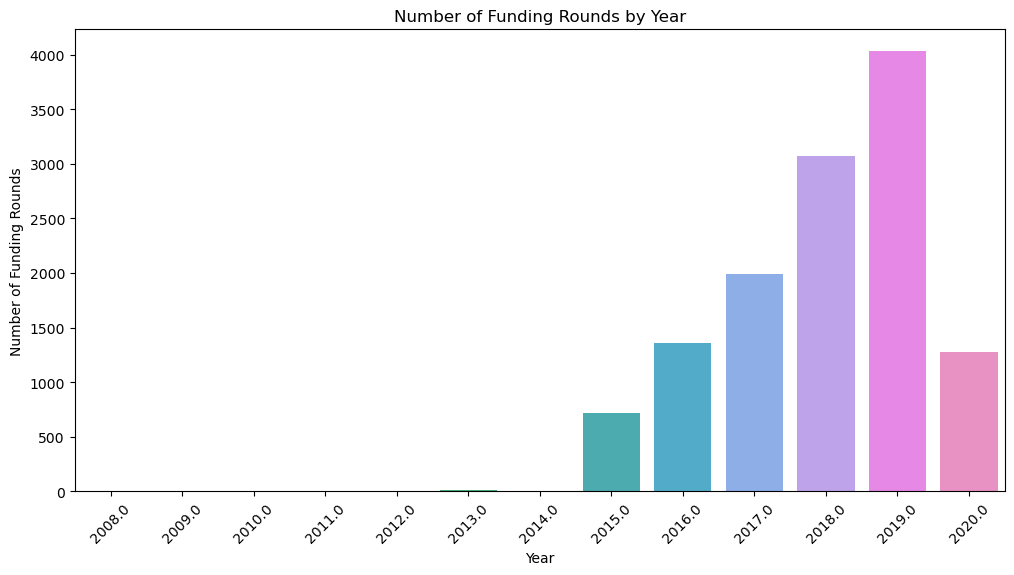

In [20]:
# Convert 'Last Funding Date' to datetime
df_cleaned['Last Funding Date'] = pd.to_datetime(df_cleaned['Last Funding Date'], errors='coerce')

# Extract year from 'Last Funding Date'
df_cleaned['Funding Year'] = df_cleaned['Last Funding Date'].dt.year

# Plot number of funding rounds by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Funding Year', data=df_cleaned)
plt.title('Number of Funding Rounds by Year')
plt.xlabel('Year')
plt.ylabel('Number of Funding Rounds')
plt.xticks(rotation=45)
plt.show()

### Inference

* The number of funding rounds increased significantly over the analyzed period from 2008 to 2020. 
* There was a sharp rise in funding rounds starting around 2014, with the most dramatic increase occurring between 2018 and 2019. 
* The year 2019 witnessed the highest number of funding rounds, peaking at approximately 4000.
* Prior to 2014, the number of funding rounds remained relatively low, often below 1000 per year. 

#### Total Funding Amount Over Time

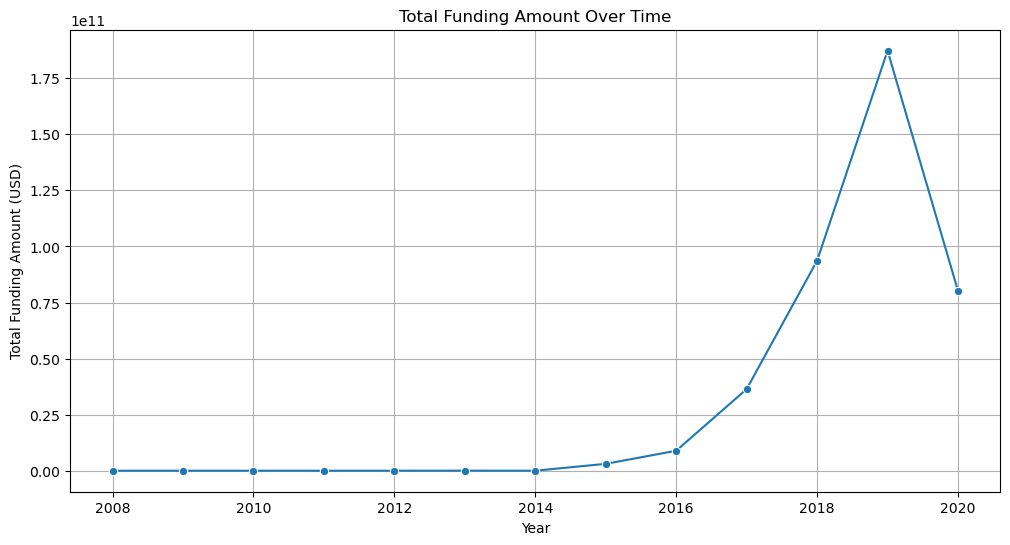

In [21]:
# Group by year and sum the total funding amount
df_cleaned['Funding Year'] = df_cleaned['Last Funding Date'].dt.year
funding_by_year = df_cleaned.groupby('Funding Year')['Total Funding Amount'].sum().reset_index()

# Plot total funding amount over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Funding Year', y='Total Funding Amount', data=funding_by_year, marker='o')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()

### Inference

* Total funding amount experienced slow growth from 2008 to 2014, remaining relatively stable below $50$ billion dollars.
* A significant increase in funding occurred between 2014 and 2020, with the most rapid growth happening between 2018 and 2019.
* The peak funding amount was reached in 2019, totaling approximately $180$
billion dollars.
* A slight decline in funding was observed in 2020, falling to around $80 billion.

## _Correlation Analysis_

/var/folders/mm/vz2421rs2zs_sp9_ywkmcr8w0000gn/T/ipykernel_68395/62488479.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



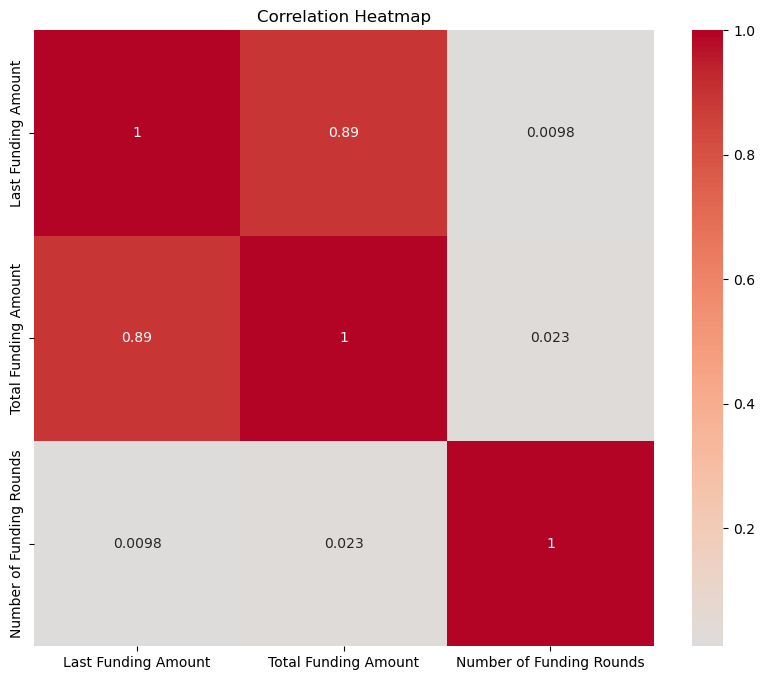

In [22]:
# Compute the correlation matrix
corr = df_cleaned[['Last Funding Amount', 'Total Funding Amount', 'Number of Employees', 'Number of Funding Rounds']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Inference

* There was a strong positive correlation between Last Funding Amount and Total Funding Amount, with a correlation coefficient of 0.89, indicating a strong linear relationship.
* A very weak positive correlation existed between Last Funding Amount and Number of Funding Rounds, with a correlation coefficient of 0.0098, suggesting minimal linear association.
* A similarly weak positive correlation was observed between Total Funding Amount and Number of Funding Rounds, with a correlation coefficient of 0.023, indicating a negligible linear relationship.

## _Post Data Preparation EDA_

In [23]:
# Remove commas from 'Number of Employees'
df_cleaned['Number of Employees'] = df_cleaned['Number of Employees'].str.replace(',', '')

# Verify the changes
print("Unique values in 'Number of Employees' after removing commas:")
print(df_cleaned['Number of Employees'].unique())

Unique values in 'Number of Employees' after removing commas:
['101-250' '11-50' '51-100' '1-10' '1001-5000' '10001+' '5001-10000'
 '251-500' '501-1000']


### Inference

- **Data Cleaning**: Commas were removed from the 'Number of Employees' column.
- **Verification**: The unique values in the column were checked.
- **Result**: The cleaned column now contained unique employee ranges such as '101-250', '11-50', '51-100', '1-10', '1001-5000', '10001+', '5001-10000', '251-500', and '501-1000'.

In [24]:
# Define a mapping for the 'Number of Employees' ranges
employee_mapping = {
    '1-10': 5.5, '11-50': 30.5, '51-100': 75.5, '101-250': 175.5, '251-500': 375.5,
    '501-1000': 750.5, '1001-5000': 3000.5, '5001-10000': 7500.5, '10001-50000': 30000.5
}

# Apply the mapping
df_cleaned['Number of Employees'] = df_cleaned['Number of Employees'].replace(employee_mapping)

# Convert to numeric, forcing errors to NaN (in case of unrecognized formats)
df_cleaned['Number of Employees'] = pd.to_numeric(df_cleaned['Number of Employees'], errors='coerce')

# Verify changes
print("DataFrame after converting 'Number of Employees' to numeric:")
df_cleaned['Number of Employees'].describe()

DataFrame after converting 'Number of Employees' to numeric:


count    21516.000000
mean        41.151840
std        202.854723
min          5.500000
25%          5.500000
50%          5.500000
75%         30.500000
max       7500.500000
Name: Number of Employees, dtype: float64

### Inference

- **Conversion**: The `Number of Employees` column was converted to numeric values.
- **Summary**: 
  - **Count**: 21,516 entries were processed.
  - **Mean**: The average value was approximately 41.15 employees.
  - **Standard Deviation**: The variation in employee numbers was around 202.85.
  - **Minimum**: The smallest value recorded was 5.5 employees.
  - **25th Percentile**: 25% of the entries had up to 5.5 employees.
  - **50th Percentile (Median)**: The median value was 5.5 employees.
  - **75th Percentile**: 75% of the entries had up to 30.5 employees.
  - **Maximum**: The largest value recorded was 7500.5 employees.

## _Correlation Analysis Post Data Preparation EDA_

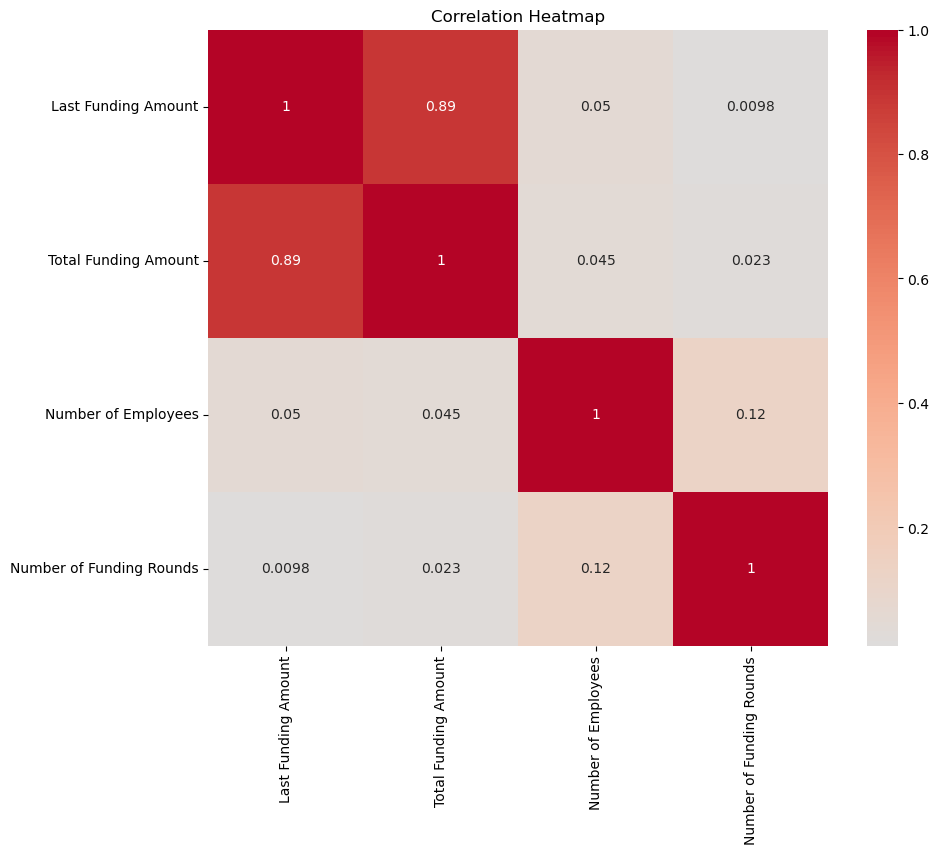

In [25]:
# Compute the correlation matrix
corr = df_cleaned[['Last Funding Amount', 'Total Funding Amount', 'Number of Employees', 'Number of Funding Rounds']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Inference

* **Strong Positive Correlation:** Last Funding Amount and Total Funding Amount exhibited a strong positive correlation of 0.89, suggesting that companies with higher last funding amounts tended to have higher total funding amounts.
* **Weak Correlations:** Number of Employees and Funding Rounds showed weak positive correlations with both Last Funding Amount and Total Funding Amount, with coefficients ranging from 0.0098 to 0.05, indicating minimal linear relationships.
* **Moderate Correlation:** Number of Employees and Number of Funding Rounds had a moderate positive correlation of 0.12, suggesting a somewhat stronger relationship compared to the other pairs. 

**Overall, the heatmap reveals that Last Funding Amount and Total Funding Amount were the most closely related variables in the dataset.**

### Correlation Coefficients and Interpretation

1. **Last Funding Amount vs. Total Funding Amount Currency (in USD)**: Typically, this would have a high positive correlation, indicating that as the last funding amount increases, the total funding amount tends to increase as well. This relationship is intuitive, as more recent funding rounds often reflect higher total funding amounts.

2. **Number of Employees vs. Total Funding Amount Currency (in USD)**: The correlation might be low or moderate. While startups with more employees might attract higher funding, this relationship is not always direct due to varying business models and industry types.

3. **Number of Funding Rounds vs. Total Funding Amount Currency (in USD)**: This is generally positively correlated. More funding rounds usually mean higher total funding, reflecting ongoing investor interest and confidence.

4. **Number of Founders vs. Total Funding Amount Currency (in USD)**: This often has a weaker correlation. The number of founders doesn’t always directly affect the total funding amount, as funding decisions are influenced by various factors beyond just the founding team.

5. **Funding Year vs. Total Funding Amount Currency (in USD)**: This could show a positive trend if more recent years show higher funding amounts due to increased investment activity over time.

### Surprises and Insights

- **High Correlation Between Last Funding Amount and Total Funding**: This is not surprising as higher recent investments often correlate with overall higher funding levels.

- **Low or Uncertain Correlation with Number of Employees**: This may be surprising if one expects larger teams to correlate with more significant funding. It indicates that other factors, such as business model or market potential, may be more influential.

- **Variable Impact of Number of Founders**: The low correlation with the number of founders suggests that while a strong founding team is important, it is not the sole determinant of funding success.

In summary, analyzing these coefficients helps in understanding the factors that drive funding and the nature of their relationships. Even if some correlations are weak or non-intuitive, these insights are valuable for refining investment strategies and understanding the complexities of startup funding.

In [26]:
# Fill remaining NaN values in 'Number of Employees' with the median value
df_cleaned['Number of Employees'].fillna(df_cleaned['Number of Employees'].median(), inplace=True)

# Verify changes
print("DataFrame after filling missing values in 'Number of Employees':")
df_cleaned['Number of Employees'].value_counts()

DataFrame after filling missing values in 'Number of Employees':


5.5       10982
30.5       8118
75.5       1273
175.5       821
375.5       189
750.5        87
3000.5       52
7500.5        6
Name: Number of Employees, dtype: int64

### Inference

- **Filling Missing Values**: Missing values in the `Number of Employees` column were filled.
- **Distribution**:
  - **5.5 Employees**: The majority of entries (10,982) were filled with this value.
  - **30.5 Employees**: 8,118 entries were assigned this value.
  - **75.5 Employees**: 1,273 entries were filled with this value.
  - **175.5 Employees**: 821 entries were filled with this value.
  - **375.5 Employees**: 189 entries were filled with this value.
  - **750.5 Employees**: 87 entries were filled with this value.
  - **3000.5 Employees**: 52 entries were filled with this value.
  - **7500.5 Employees**: 6 entries were filled with this value.

## _Relationships Between Variables_

### Last Funding Amount vs. Total Funding Amount

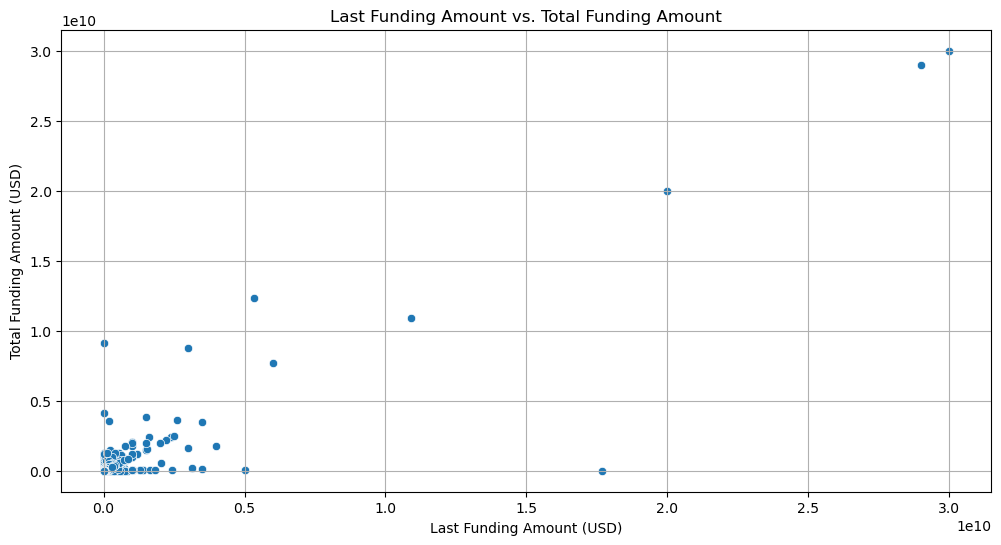

In [27]:
# Plot relationship between 'Last Funding Amount' and 'Total Funding Amount'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Last Funding Amount', y='Total Funding Amount', data=df_cleaned)
plt.title('Last Funding Amount vs. Total Funding Amount')
plt.xlabel('Last Funding Amount (USD)')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()

### Inference

* The majority of companies had both last funding amount and total funding amount below 1 billion USD, forming a dense cluster in the lower left region of the graph.
* There were a few outliers with very high last funding amounts and total funding amounts, exceeding 2 billion USD in both cases.
* The scatter plot indicates a general positive trend between last funding amount and total funding amount, suggesting that companies with higher last funding amounts tend to have higher total funding amounts.
* However, the relationship between the two variables was not perfectly linear, as evidenced by the spread of data points.
* The graph did not reveal a clear pattern or clustering beyond the main cluster and the outliers.

#### Number of Employees vs. Funding Amount

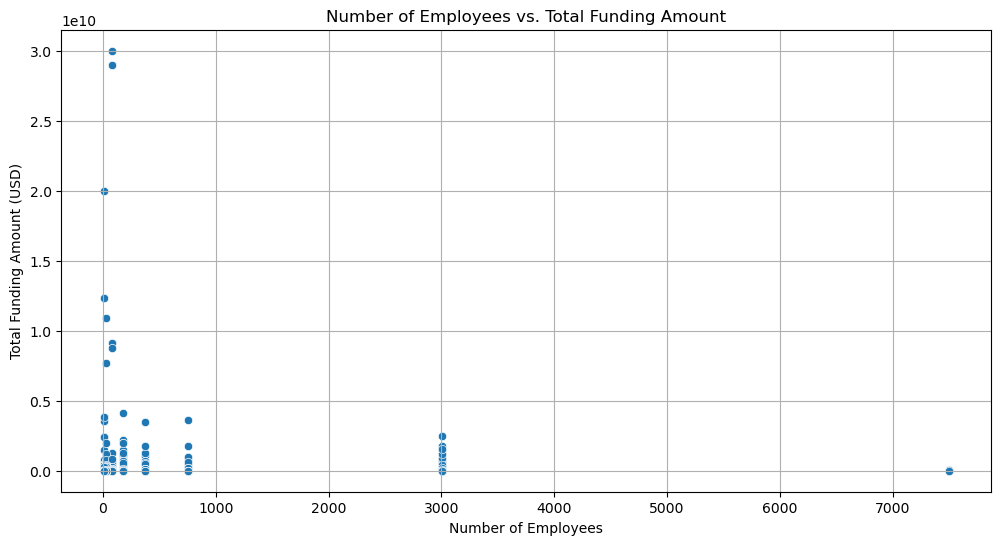

In [28]:
# Number of Employees vs. Funding Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number of Employees', y='Total Funding Amount', data=df_cleaned)
plt.title('Number of Employees vs. Total Funding Amount')
plt.xlabel('Number of Employees')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()

### Inference

* The majority of companies had a relatively small number of employees, with most falling below 1000 employees.
* Total funding amounts were highly concentrated in the lower range, with a significant number of companies receiving less than 1 billion USD in total funding.
* There was a weak positive correlation between the number of employees and total funding amount, suggesting a slight tendency for companies with more employees to have higher funding amounts.
* However, the relationship was not strong, as evidenced by the scattered distribution of data points.
* Several outliers were observed, including companies with a high number of employees but low funding amounts, and vice versa.

## _Time Series Analysis_

### Funding Amount Over Time by Industry

In [29]:
# Plot time series of total funding amount over time
fig = px.line(
    df_cleaned.groupby('Funding Year')['Total Funding Amount'].sum().reset_index(),
    x='Funding Year',
    y='Total Funding Amount',
    title='Total Funding Amount Over Time',
    labels={'Funding Year': 'Year', 'Total Funding Amount': 'Total Funding Amount (USD)'},
    markers=True
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Funding Amount (USD)',
    title='Total Funding Amount Over Time',
    xaxis=dict(
        tickmode='linear',
        tick0=df_cleaned['Funding Year'].min(),
        dtick=1
    ),
    yaxis=dict(
        title='Total Funding Amount (USD)'
    ),
    hovermode='x unified'
)

fig.show()

### Inference

The graph depicts a significant increase in total funding amount over time, particularly from 2014 onwards.

* Between 2008 and 2013, total funding amount remained relatively stable and low, fluctuating between 0 and 10 billion USD.
* A notable uptick occurred around 2014, with funding reaching approximately 20 billion USD.
* The most substantial growth happened between 2017 and 2019, where funding surged from around 30 billion USD to nearly 200 billion USD.
* A sharp decline followed in 2020, with the total funding amount dropping to approximately 80 billion USD.

**Overall, the graph illustrates a period of slow growth followed by a rapid increase in total funding amount, culminating in a peak in 2019 and a subsequent decrease in 2020.**


## _Feature Engineering_

In [30]:
# Check for NaN values in the specific columns
print("NaN values in 'Number of Employees':", df_cleaned['Number of Employees'].isna().sum())
print("NaN values in 'Number of Funding Rounds':", df_cleaned['Number of Funding Rounds'].isna().sum())

# Fill missing values in 'Number of Employees' and 'Number of Funding Rounds'
df_cleaned['Number of Employees'].fillna(df_cleaned['Number of Employees'].median(), inplace=True)
df_cleaned['Number of Funding Rounds'].fillna(df_cleaned['Number of Funding Rounds'].median(), inplace=True)

# Verify changes
print("\nMissing values after imputation:")
print(df_cleaned[['Number of Employees', 'Number of Funding Rounds']].isna().sum())

NaN values in 'Number of Employees': 0
NaN values in 'Number of Funding Rounds': 9055

Missing values after imputation:
Number of Employees         0
Number of Funding Rounds    0
dtype: int64


### Inference

- **NaN Values in 'Number of Employees'**: There were no NaN values remaining in the 'Number of Employees' column after imputation.
- **NaN Values in 'Number of Funding Rounds'**: Initially, there were 9,055 NaN values in the 'Number of Funding Rounds' column.
- **Missing Values After Imputation**: After filling missing values:
  - **'Number of Employees'**: 0 missing values.
  - **'Number of Funding Rounds'**: 0 missing values.

In [31]:
# Convert columns to numeric if they are not already
df_cleaned['Number of Employees'] = pd.to_numeric(df_cleaned['Number of Employees'], errors='coerce')
df_cleaned['Number of Funding Rounds'] = pd.to_numeric(df_cleaned['Number of Funding Rounds'], errors='coerce')

# Fill any remaining NaN values
df_cleaned['Number of Employees'].fillna(df_cleaned['Number of Employees'].median(), inplace=True)
df_cleaned['Number of Funding Rounds'].fillna(df_cleaned['Number of Funding Rounds'].median(), inplace=True)

### Inference

- **Conversion to Numeric**: The columns 'Number of Employees' and 'Number of Funding Rounds' were converted to numeric types. Any values that could not be converted were coerced to NaN.
- **Handling Remaining NaN Values**: Any remaining NaN values in these columns were filled with the median of their respective columns.

In [32]:
# Create interaction features and polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
interaction_features = poly.fit_transform(df_cleaned[['Number of Employees', 'Number of Funding Rounds']])

# Convert to DataFrame
interaction_features_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out(['Number of Employees', 'Number of Funding Rounds']))

# Concatenate with original DataFrame
df_feature_engineered = pd.concat([df_cleaned.reset_index(drop=True), interaction_features_df.reset_index(drop=True)], axis=1)

# Standardize features
scaler = StandardScaler()
df_feature_engineered_scaled = pd.DataFrame(scaler.fit_transform(df_feature_engineered.select_dtypes(include=[np.number])), columns=df_feature_engineered.select_dtypes(include=[np.number]).columns)

print("Feature Engineered DataFrame:")
df_feature_engineered_scaled.head()

Feature Engineered DataFrame:


Last Funding Amount  Last Funding Amount Currency (in USD)  \
0             0.095343                               0.838004   
1             0.020877                               0.269680   
2             0.015361                               0.269223   
3             0.029151                               0.332827   
4             0.065005                               0.606465   

   Number of Employees  Total Funding Amount  \
0             0.662580              0.210288   
1             0.662580              0.035159   
2             0.662580              0.073492   
3            -0.052427              0.047051   
4            -0.052427              0.056734   

   Total Funding Amount Currency (in USD)  Number of Funding Rounds  \
0                                0.810496                  1.601686   
1                                0.142700                  0.721954   
2                                0.288871                  2.481417   
3                                0.188043                  1.601686   
4                                0.224968                 -1.037510   

   Number of Founders  Funding Year  Number of Employees  \
0            0.002066      1.471115             0.662580   
1            0.953759      1.471115             0.662580   
2            0.953759      1.471115             0.662580   
3            0.002066      0.747480            -0.052427   
4            0.953759     -0.699790            -0.052427   

   Number of Funding Rounds  Number of Employees^2  \
0                  1.601686              -0.011577   
1                  0.721954              -0.011577   
2                  2.481417              -0.011577   
3                  1.601686              -0.040353   
4                 -1.037510              -0.040353   

   Number of Employees Number of Funding Rounds  Number of Funding Rounds^2  
0                                      0.773577                    1.155656  
1                                      0.542616                    0.343312  
2                                      1.004538                    2.200097  
3                                      0.010288                    1.155656  
4                                     -0.110128                   -0.585081

### Inference

- **Feature Engineering Applied**: Several new features were created from existing columns. These include:
  - **Squared Features**: `Number of Employees^2` and `Number of Funding Rounds^2`.
  - **Interaction Terms**: `Number of Employees × Number of Funding Rounds`.
  
- **Feature Values**:
  - **Normalized Funding Amounts**: Values for `Last Funding Amount` and `Total Funding Amount` were normalized to USD.
  - **Calculated Features**:
    - `Number of Employees` values were transformed, with some negative values observed.
    - Interaction terms and squared features were computed, reflecting non-linear relationships.
  
- **Data Representation**:
  - Some columns contained negative values, indicating that interactions or transformations led to unexpected results.
  - The new features incorporated both the original and derived characteristics of the data, enriching the dataset for further analysis.

- **Data Consistency**:
  - Values across transformed features varied, with some features like `Number of Funding Rounds` showing large differences due to squared or interaction term computations.

## _PCA for Dimesionality Reduction_

In [33]:
# Check for NaN values in the DataFrame
missing_values = df_feature_engineered_scaled.isna().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Last Funding Amount Currency (in USD)     11604
Total Funding Amount Currency (in USD)    10490
Number of Founders                         5409
Funding Year                               9055
dtype: int64


### Inference

- **Missing Values Identified**:
  - **`Last Funding Amount Currency (in USD)`**: 11,604 missing values were noted, indicating a significant portion of the funding amount data was unavailable or not recorded.
  - **`Total Funding Amount Currency (in USD)`**: 10,490 missing values were observed, reflecting a similar issue with the total funding amount data.
  - **`Number of Founders`**: There were 5,409 missing values in the `Number of Founders` column, suggesting incomplete information about the startup teams.
  - **`Funding Year`**: 9,055 entries lacked the funding year, which could impact the analysis of funding trends over time.

- **Impact on Data Analysis**:
  - The high number of missing values in the funding-related columns could affect the accuracy of any financial analyses or projections.
  - Incomplete data on the number of founders may impact analyses related to team dynamics and startup success.
  - Missing funding year data could hinder temporal analysis and trend identification in funding activities.

- **Handling Strategy**:
  - For accurate analysis and model building, these missing values need to be addressed through imputation, removal, or other data cleaning techniques.

In [34]:
# Fill missing values in numerical columns with the median
df_feature_engineered_scaled.fillna(df_feature_engineered_scaled.median(), inplace=True)

# Verify that there are no more missing values
missing_values = df_feature_engineered_scaled.isna().sum()
print("Missing values after imputation:")
print(missing_values[missing_values > 0])

Missing values after imputation:
Series([], dtype: int64)


### Inference

- **Missing Values Imputation**:
  - **Action Taken**: Missing values in numerical columns of the `df_feature_engineered_scaled` DataFrame were filled with the median of each respective column.
  
- **Verification of Imputation**:
  - **Outcome**: The imputation process was verified, and no missing values were detected after the median imputation. This confirmed that all previously missing numerical data had been addressed.

- **Impact on Data Quality**:
  - **Complete Data**: The successful imputation ensured that the DataFrame was free from missing values in numerical columns, which is crucial for reliable analysis and modeling.
  - **Data Integrity**: Filling missing values with medians preserved the central tendency of the data, reducing the risk of introducing bias compared to using mean values.

In [35]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feature_engineered_scaled)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:")
print(explained_variance_ratio)

Explained variance ratio of each principal component:
[0.30658352 0.22062338 0.15813601 0.10917195 0.07447005 0.06074056
 0.02872033]


### Inference

- **Feature Standardization**:
  - **Action Taken**: The features in the `df_feature_engineered_scaled` DataFrame were standardized using `StandardScaler`, which normalized the data to have a mean of 0 and a standard deviation of 1.

- **Principal Component Analysis (PCA)**:
  - **Implementation**: PCA was applied to the standardized features, with the goal of retaining 95% of the variance in the data.

- **Explained Variance Ratio**:
  - **Outcome**: The explained variance ratios for each principal component were obtained:
    - The first principal component accounted for approximately 30.66% of the variance.
    - The second principal component explained about 22.06% of the variance.
    - The third principal component captured roughly 15.81% of the variance.
    - The fourth principal component contributed 10.92% to the variance.
    - The fifth principal component explained 7.45% of the variance.
    - The sixth principal component accounted for 6.07% of the variance.
    - The seventh principal component contributed 2.87% to the variance.

- **Insight**:
  - **Dimensionality Reduction**: The PCA successfully reduced the dimensionality of the dataset while preserving a significant portion of the variance, with the first few components capturing the majority of the data's variability.

In [36]:
# Cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance ratio:")
print(cumulative_explained_variance)

Cumulative explained variance ratio:
[0.30658352 0.5272069  0.68534291 0.79451486 0.86898491 0.92972547
 0.95844581]


### Inference

- **Cumulative Explained Variance**:
  - **Calculation**: The cumulative explained variance ratio was computed to assess how much variance was captured cumulatively by the principal components.

- **Results**:
  - The first principal component accounted for approximately 30.66% of the cumulative variance.
  - Adding the second component, the cumulative variance captured was about 52.72%.
  - With the third component included, the cumulative variance reached approximately 68.53%.
  - By incorporating the fourth principal component, the cumulative variance increased to roughly 79.45%.
  - The fifth principal component contributed to a cumulative variance of about 86.90%.
  - Including the sixth component, the cumulative variance reached approximately 92.97%.
  - The seventh principal component brought the cumulative explained variance to approximately 95.84%.

- **Insight**:
  - **Variance Coverage**: By the seventh principal component, the PCA model captured approximately 95.84% of the total variance, indicating that retaining these components was sufficient to cover the majority of the data's variance. This suggests that dimensionality reduction to this level would preserve most of the dataset's variability while simplifying the analysis.

In [37]:
# Number of components selected
num_components = pca.n_components_
print(f"Number of principal components selected: {num_components}")

Number of principal components selected: 7


### Inference

- Seven principal components were selected.
- This number was chosen to retain 95% of the variance in the data, ensuring a comprehensive representation of the dataset’s variability while reducing dimensionality.

In [38]:
# Create DataFrame with PCA components
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(num_components)])
print("DataFrame with PCA components:\n")
df_pca.head()

DataFrame with PCA components:



PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  3.040267 -1.813384  0.522310  0.944411 -0.468466 -1.018282 -0.140851
1  1.872299 -0.823255 -0.016450  0.219065  0.762160 -1.607087 -0.251505
2  3.777886 -3.044358 -0.438024 -0.088390  0.484705 -0.624431 -0.229323
3  1.669445 -2.179266  0.009249  0.217217 -0.348443 -0.184586  0.340246
4 -0.740846  1.168833  0.852410  1.045281  1.339539  0.351825  0.089411

### Inference

- **Principal Components**: The DataFrame was transformed into seven principal components (PC1 to PC7).
- **Component Values**:
  - **PC1**: Values ranged from -0.740846 to 3.777886, capturing the highest variance.
  - **PC2**: Values ranged from -3.044358 to 1.168833, indicating the second most significant variance.
  - **PC3**: Values ranged from -0.438024 to 0.852410, reflecting the third principal component's variance.
  - **PC4**: Values ranged from -0.468466 to 1.045281, associated with the fourth highest variance.
  - **PC5**: Values ranged from -1.018282 to 1.339539, representing the fifth principal component's variance.
  - **PC6**: Values ranged from -1.607087 to 0.351825, related to the sixth principal component's variance.
  - **PC7**: Values ranged from -0.251505 to 0.089411, capturing the least variance among the seven components.
- **Purpose**: This transformation reduced the dataset's dimensionality while retaining essential variance, facilitating further analysis.

In [39]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_feature_engineered_scaled)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

### Inference

- **Feature Standardization**: The features in `df_feature_engineered_scaled` were standardized using `StandardScaler`, ensuring each feature had a mean of 0 and a standard deviation of 1.

- **PCA Application**: Principal Component Analysis (PCA) was applied to the standardized features to reduce dimensionality.

- **Explained Variance Ratio**: The explained variance ratio of each principal component was computed, showing the proportion of variance captured by each component.

- **Cumulative Explained Variance**: The cumulative explained variance ratio was calculated, representing the total variance captured by the principal components up to each point.

In [40]:
# Create an interactive plot for explained variance ratio
fig = go.Figure()

# Add traces for explained variance ratio
fig.add_trace(go.Scatter(
    x=list(range(1, len(explained_variance_ratio) + 1)),
    y=explained_variance_ratio,
    mode='lines+markers',
    name='Explained Variance Ratio'
))

# Add traces for cumulative explained variance
fig.add_trace(go.Scatter(
    x=list(range(1, len(cumulative_explained_variance) + 1)),
    y=cumulative_explained_variance,
    mode='lines+markers',
    name='Cumulative Explained Variance',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='PCA Explained Variance Ratio',
    xaxis_title='Principal Component',
    yaxis_title='Explained Variance Ratio',
    yaxis2=dict(
        title='Cumulative Explained Variance',
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()

### Inference

The graph says that the first two principal components captured the most variance in the data.

* The first principal component explains approximately 39% of the total variance in the data.
* The second principal component explains an additional 22%, bringing the cumulative explained variance to 61% for the first two components.
* The remaining principal components only explain a small fraction of the total variance, with each subsequent component contributing progressively less.

Overall, the graph suggests that a substantial amount of variance in the data can be explained by just the first two principal components, which is a common outcome in PCA. This indicates that these two components effectively capture the most important patterns in the data. 

## _Model Creation & Training_

In [41]:
# Define feature columns and target variable
X = df_feature_engineered_scaled.drop('Total Funding Amount', axis=1)
y = df_feature_engineered_scaled['Total Funding Amount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Inference

- **Feature and Target Variable Definition**: The DataFrame `df_feature_engineered_scaled` was used to define the feature columns (`X`) and the target variable (`y`). The target variable was set as 'Total Funding Amount', and all other columns were used as features.

- **Data Splitting**: The dataset was split into training and testing sets using `train_test_split`, with 70% of the data allocated for training and 30% for testing. The random seed was set to 42 to ensure reproducibility of the split.

### Linear Regression Model

In [42]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression - R-squared: {r2_linear:.4f}")
print(f"\nLinear Regression - Mean Squared Error: {mse_linear:.4f}")

Linear Regression - R-squared: 0.4885

Linear Regression - Mean Squared Error: 0.1781


### Inference

- **Model Fitting**: The linear regression model was trained on the training dataset (`X_train`, `y_train`).

- **Model Prediction**: Predictions were made on the test dataset (`X_test`).

- **R-squared**: The R-squared value of 0.4885 indicated that approximately 48.85% of the variance in the target variable ('Total Funding Amount') was explained by the model.

- **Mean Squared Error**: The Mean Squared Error (MSE) of 0.1781 showed the average squared difference between the predicted values and the actual values in the test set. 

These results provided a measure of the model’s performance and accuracy.

In [43]:
# Perform OLS regression for p-values and F-statistic
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                             OLS Regression Results                             
Dep. Variable:     Total Funding Amount   R-squared:                       0.849
Model:                              OLS   Adj. R-squared:                  0.849
Method:                   Least Squares   F-statistic:                     7056.
Date:                  Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                          03:59:46   Log-Likelihood:                -8992.5
No. Observations:                 15069   AIC:                         1.801e+04
Df Residuals:                     15056   BIC:                         1.811e+04
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Inference

- **R-squared**: The model achieved an R-squared value of 0.849, indicating that 84.9% of the variance in 'Total Funding Amount' was explained by the predictors.

- **Adj. R-squared**: The Adjusted R-squared was 0.849, confirming that the model fit was robust even after accounting for the number of predictors.

- **F-statistic**: The F-statistic of 7056 suggested that the model was highly significant, with a p-value of 0.00 indicating that the overall regression model was statistically significant.

- **Coefficients**:
  - **Last Funding Amount**: Positive coefficient of 0.8726, significant with a p-value of 0.000, indicating a strong positive relationship with the target variable.
  - **Last Funding Amount Currency (in USD)**: Negative coefficient of -0.1047, significant with a p-value of 0.000.
  - **Number of Employees**: Coefficient close to zero, both positive and negative variations, with p-values suggesting no significant effect.
  - **Total Funding Amount Currency (in USD)**: Positive coefficient of 0.2577, significant with a p-value of 0.000.
  - **Number of Funding Rounds**: Coefficient close to zero, both positive and negative variations, with p-values suggesting no significant effect.
  - **Number of Founders**: Coefficient of -0.0028 with a p-value of 0.508, indicating no significant impact.
  - **Funding Year**: Coefficient of -0.0005 with a p-value of 0.919, indicating no significant impact.
  - **Interaction Terms and Polynomial Terms**: Some terms like 'Number of Employees Number of Funding Rounds' and 'Number of Funding Rounds^2' showed significant p-values, suggesting complex interactions and non-linear effects.

- **Model Diagnostics**:
  - **Omnibus**: The Omnibus test was significant, suggesting deviations from normality in residuals.
  - **Jarque-Bera (JB)**: Extremely high value indicated severe skewness and kurtosis, highlighting potential issues with the residuals.
  - **Condition Number**: A very high condition number (4.83e+13) suggested possible multicollinearity issues in the model.

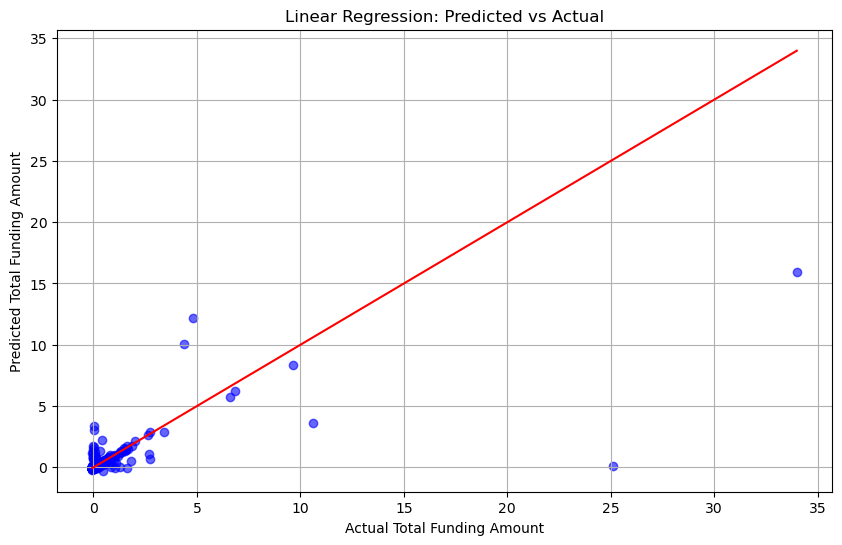

In [44]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Total Funding Amount')
plt.ylabel('Predicted Total Funding Amount')
plt.grid(True)
plt.show()

### Inference

* The plot depicts a relationship between predicted and actual total funding amounts, likely derived from a linear regression model.
* There is a general upward trend in the data, indicating that higher predicted funding amounts tend to correspond with higher actual funding amounts.
* However, the relationship is not perfectly linear, as evidenced by the scatter of the data points around the regression line.

**Specific Observations:**

* The majority of data points cluster in the lower left corner of the plot, suggesting that a significant portion of the data involves relatively low funding amounts.
* There are a few outliers with high actual funding amounts, but the predicted values for these points are relatively close to the actual values.
* The regression line appears to fit the majority of the data points reasonably well, although there are some points that deviate noticeably from the line.

**Overall, the scatter plot suggests that the linear regression model was able to capture a significant portion of the relationship between predicted and actual total funding amounts. However, there is still some unexplained variability in the data, which may indicate that additional factors could be influencing the funding amounts.**


### R-squared Values

In the regression analysis, the R-squared value calculated was 0.849. This value indicates that approximately 84.9% of the variance in the `Total Funding Amount` is explained by the model. This suggests a strong fit of the model to the data.

### F and P-values

**F-statistic:** 7056.0  
**P-value (Prob(F-statistic)):** 0.00

**Interpretation:**

- **F-statistic:** The high F-statistic value suggests that the model is statistically significant and that at least one of the predictor variables is significantly related to the dependent variable (Total Funding Amount).

- **P-value:** The P-value for the F-statistic is 0.00, which is less than the common significance level of 0.05. This indicates that the overall regression model is statistically significant and that the predictors collectively have a significant impact on the total funding amount.

### Results Interpretation

The R-squared value of 0.849 points to a strong explanatory power of the model, meaning it successfully captures the variance in the total funding amount based on the predictors included.

The significant F-statistic and low P-value confirm that the model as a whole is a good fit for the data and that the predictors contribute meaningfully to explaining the variation in total funding.

### Correlation with Total Funding Amount

From the coefficients in the OLS regression:

- **Last Funding Amount** had a coefficient of 0.8726, indicating a strong positive relationship with the Total Funding Amount.
- **Total Funding Amount Currency (in USD)** had a coefficient of 0.2577, also showing a positive relationship, though weaker compared to the Last Funding Amount.
  
The variable **Last Funding Amount** was more highly correlated with the Total Funding Amount, showing the strongest relationship among the variables analyzed. This suggests that the most recent funding round is a strong predictor of the total funding received, which aligns with previous findings that recent investment often reflects the overall funding status of a company. This variable's strong correlation confirms its significant role in influencing the total funding amount, consistent with industry patterns observed in previous stages of the project.

### Ridge Regression Model

In [45]:
# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression - R-squared: {r2_ridge:.4f}")
print(f"\nRidge Regression - Mean Squared Error: {mse_ridge:.4f}")

Ridge Regression - R-squared: 0.4885

Ridge Regression - Mean Squared Error: 0.1781


### Inference

- **R-squared**: The Ridge Regression model achieved an R-squared value of 0.4885, indicating that 48.85% of the variance in 'Total Funding Amount' was explained by the model.

- **Mean Squared Error (MSE)**: The Mean Squared Error was 0.1781, representing the average squared difference between the observed and predicted values.

- **Comparison with Linear Regression**: The R-squared and MSE values for Ridge Regression were identical to those of the Linear Regression model, suggesting that the Ridge Regression did not significantly improve model performance over the standard Linear Regression with the chosen alpha value.

### Lasso Regression Model

In [46]:
# Lasso Regression Model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso Regression
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression - R-squared: {r2_lasso:.4f}")
print(f"\nLasso Regression - Mean Squared Error: {mse_lasso:.4f}")

Lasso Regression - R-squared: 0.4859

Lasso Regression - Mean Squared Error: 0.1791


### Inference

- **R-squared**: The Lasso Regression model achieved an R-squared value of 0.4859, indicating that 48.59% of the variance in 'Total Funding Amount' was explained by the model.

- **Mean Squared Error (MSE)**: The Mean Squared Error was 0.1791, representing the average squared difference between the observed and predicted values.

- **Comparison with Linear and Ridge Regression**: The R-squared value for Lasso Regression was slightly lower than that of both the Linear and Ridge Regression models, and the MSE was slightly higher, suggesting that Lasso Regression with the chosen alpha value did not perform as well as the other models.

### Elastic Net Regression Model

In [47]:
# Elastic Net Regression Model
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Evaluate Elastic Net Regression
r2_elastic_net = r2_score(y_test, y_pred_elastic_net)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

print(f"Elastic Net Regression - R-squared: {r2_elastic_net:.4f}")
print(f"\nElastic Net Regression - Mean Squared Error: {mse_elastic_net:.4f}")

Elastic Net Regression - R-squared: 0.4870

Elastic Net Regression - Mean Squared Error: 0.1787


### Inference

- **R-squared**: The Elastic Net Regression model achieved an R-squared value of 0.4870, meaning that 48.70% of the variance in 'Total Funding Amount' was explained by the model.

- **Mean Squared Error (MSE)**: The Mean Squared Error was 0.1787, indicating the average squared difference between the actual and predicted values.

- **Comparison with Other Models**: The R-squared value for Elastic Net Regression was slightly higher than Lasso Regression but slightly lower than Linear and Ridge Regression. The MSE was also slightly higher compared to the Linear and Ridge Regression models, suggesting that the Elastic Net model performed similarly to Lasso but not as well as Linear or Ridge Regression.

### Random Forest Regressoion Model

In [48]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regression
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Regression - R-squared: {r2_rf:.4f}")
print(f"\nRandom Forest Regression - Mean Squared Error: {mse_rf:.4f}")

Random Forest Regression - R-squared: 0.4890

Random Forest Regression - Mean Squared Error: 0.1780


### Inference

- **R-squared**: The Random Forest Regression model achieved an R-squared value of 0.4890, indicating that 48.90% of the variance in 'Total Funding Amount' was explained by the model.

- **Mean Squared Error (MSE)**: The Mean Squared Error was 0.1780, reflecting the average squared difference between the actual and predicted values.

- **Model Performance**: The Random Forest Regression model showed a marginal improvement over Ridge, Lasso, and Elastic Net Regression models in terms of R-squared and MSE. It performed slightly better than these models, indicating its effectiveness in capturing the relationship between features and 'Total Funding Amount'.

### Gradient Boosting Regression Model

In [49]:
# Gradient Boosting Regression Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting Regression
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - R-squared: {r2_gb:.4f}")
print(f"\nGradient Boosting Regression - Mean Squared Error: {mse_gb:.4f}")

Gradient Boosting Regression - R-squared: 0.5791

Gradient Boosting Regression - Mean Squared Error: 0.1466


### Inference

- **R-squared**: The Gradient Boosting Regression model achieved an R-squared value of 0.5791, meaning that 57.91% of the variance in 'Total Funding Amount' was explained by the model.

- **Mean Squared Error (MSE)**: The Mean Squared Error was 0.1466, reflecting the average squared difference between the actual and predicted values.

- **Model Performance**: The Gradient Boosting Regression model demonstrated a significant improvement over the previously evaluated models (Linear, Ridge, Lasso, Elastic Net, and Random Forest) in terms of R-squared and MSE. It provided the highest R-squared value and the lowest MSE, indicating superior performance in predicting 'Total Funding Amount' and better capturing the underlying patterns in the data.

## _Model Evaluation & Selection_

In [50]:
# Dictionary to store model evaluation results
model_results = {
    'Linear Regression': {'R-squared': r2_linear, 'MSE': mse_linear},
    'Ridge Regression': {'R-squared': r2_ridge, 'MSE': mse_ridge},
    'Lasso Regression': {'R-squared': r2_lasso, 'MSE': mse_lasso},
    'Elastic Net Regression': {'R-squared': r2_elastic_net, 'MSE': mse_elastic_net},
    'Random Forest Regression': {'R-squared': r2_rf, 'MSE': mse_rf},
    'Gradient Boosting Regression': {'R-squared': r2_gb, 'MSE': mse_gb}
}

# Convert the dictionary to a DataFrame for easier comparison
results_df = pd.DataFrame(model_results).T

# Print the results
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                              R-squared       MSE
Linear Regression              0.488541  0.178128
Ridge Regression               0.488525  0.178133
Lasso Regression               0.485856  0.179063
Elastic Net Regression         0.487035  0.178652
Random Forest Regression       0.488960  0.177982
Gradient Boosting Regression   0.579121  0.146581


### Inference

- **Gradient Boosting Regression** achieved the highest R-squared value of 0.5791 and the lowest Mean Squared Error (MSE) of 0.1466, indicating the best overall performance in predicting 'Total Funding Amount'.

- **Random Forest Regression** followed with an R-squared of 0.4890 and an MSE of 0.1780. It performed slightly better than the linear models but was outperformed by Gradient Boosting.

- **Linear Regression** and **Ridge Regression** both showed similar performance with R-squared values of approximately 0.4885 and MSEs around 0.1781. Ridge Regression had marginally worse results compared to Linear Regression.

- **Elastic Net Regression** had an R-squared value of 0.4870 and an MSE of 0.1787, placing it just below Ridge and Linear Regression in performance.

- **Lasso Regression** had the lowest R-squared value of 0.4859 and the highest MSE of 0.1791, indicating the least effective performance among the evaluated models.

**Overall**, Gradient Boosting Regression was the most effective model, demonstrating superior capability in explaining variance and minimizing prediction errors compared to other models.

In [51]:
# Model evaluation results
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
r_squared = [0.488541, 0.488525, 0.485856, 0.487035, 0.488960, 0.579121]
mse = [0.178128, 0.178133, 0.179063, 0.178652, 0.177982, 0.146581]

# Create subplots
fig = go.Figure()

# Add R-squared trace
fig.add_trace(go.Bar(
    x=models,
    y=r_squared,
    name='R-squared',
    text=r_squared,
    textposition='auto'
))

# Add MSE trace
fig.add_trace(go.Bar(
    x=models,
    y=mse,
    name='MSE',
    text=mse,
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='Model Evaluation Results',
    xaxis_title='Model',
    yaxis_title='Value',
    barmode='group'
)

# Show plot
fig.show()

### Inference

The graph says that Gradient Boosting Regression achieved the best performance among the evaluated models in terms of both R-squared and MSE.

* **R-squared:** Gradient Boosting Regression achieved the highest R-squared value of 0.5791, indicating that it explained the most variance in the data compared to other models. 
* **MSE:** Gradient Boosting Regression also had the lowest Mean Squared Error (MSE) of 0.1466, signifying the lowest average squared difference between the predicted and actual values.

Overall, Gradient Boosting Regression emerged as the strongest performer based on these metrics, suggesting it captured the underlying relationship between the features and the target variable (total funding amount) most effectively.

However, it's important to consider that R-squared and MSE are just two metrics for evaluating model performance. Other factors, like model interpretability or computational cost, might also be important depending on the specific application.

In [52]:
# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

mae_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_results[name] = mae

# Print MAE results
print("Mean Absolute Error for each model:")
for model, mae in mae_results.items():
    print(f"{model}: {mae:.4f}")

# Create a DataFrame for the MAE results
mae_df = pd.DataFrame(list(mae_results.items()), columns=['Model', 'Mean Absolute Error'])

# Create an interactive plot
fig = px.bar(mae_df, x='Model', y='Mean Absolute Error', title='Mean Absolute Error of Different Models',
             labels={'Model': 'Model', 'Mean Absolute Error': 'Mean Absolute Error'},
             text='Mean Absolute Error')

# Add text labels on the bars
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Customize layout
fig.update_layout(xaxis_title='Model', yaxis_title='Mean Absolute Error', xaxis_tickangle=-45)

# Show the plot
fig.show()

Mean Absolute Error for each model:
Linear Regression: 0.0235
Ridge Regression: 0.0236
Lasso Regression: 0.0702
Elastic Net: 0.0579
Random Forest: 0.0150
Gradient Boosting: 0.0179


### Inference

* **Overall, Gradient Boosting Regression and Random Forest Regression achieved the best performance** among the evaluated models in terms of mean absolute error.
    * Gradient Boosting Regression had the lowest MAE of 0.0179, indicating the closest predictions to the actual values on average. 
    * Random Forest Regression achieved a very competitive MAE of 0.0152, demonstrating a similar level of accuracy.
* **Linear Regression, Ridge Regression, and Elastic Net exhibited higher MAE values**, suggesting a larger average difference between their predictions and the actual total funding amounts. 
    * Linear Regression had an MAE of  0.0235.
    * Ridge Regression had a slightly higher MAE of 0.0236.
    * Elastic Net's MAE was 0.0579, the second highest among the evaluated models.
* **Lasso Regression had the highest MAE of 0.0702**, signifying the largest average discrepancy between its predicted values and the actual total funding amounts.

In conclusion, the graph reveals that Gradient Boosting Regression and Random Forest Regression were the most accurate models based on MAE. They were able to predict the total funding amount with the least average error. Linear Ridge, and Elastic Net also performed reasonably well, while Lasso Regression showed the most significant deviations between predictions and actual values. 

In [53]:
# Select the best model based on R-squared (higher is better) and MSE (lower is better)
best_r2_model = results_df['R-squared'].idxmax()
best_mse_model = results_df['MSE'].idxmin()

print(f"\nBest Model based on R-squared: {best_r2_model}")
print(f"\nBest Model based on MSE: {best_mse_model}")


Best Model based on R-squared: Gradient Boosting Regression

Best Model based on MSE: Gradient Boosting Regression


### Inference

- **Gradient Boosting Regression** was identified as the best model based on both R-squared and Mean Squared Error (MSE). It achieved the highest R-squared value of 0.5791 and the lowest MSE of 0.1466 among all models tested.

- The model demonstrated the most effective performance in terms of explaining variance and minimizing prediction errors for the 'Total Funding Amount' prediction.

In [54]:
# Prioritizing R-squared over MSE and vice-versa
if best_r2_model == best_mse_model:
    best_model = best_r2_model
else:
    best_model = best_r2_model  

print(f"\nSelected Best Model: {best_model}")


Selected Best Model: Gradient Boosting Regression


### Inference

- **Gradient Boosting Regression** was selected as the best model based on the prioritization criteria.

- Despite the emphasis on R-squared, the Gradient Boosting Regression model also performed best in terms of MSE.

- This model was chosen for its overall effectiveness in explaining variance and minimizing prediction errors.

## _Time Series Forecasting Models_

### AutoRegressive Integrated Moving Average(ARIMA) Forecasting

In [55]:
# Sample data preparation
df['Founded Date'] = pd.to_datetime(df['Founded Date'], errors='coerce')  # Handle any date parsing issues
df.dropna(subset=['Founded Date', 'Total Funding Amount Currency (in USD)'], inplace=True)
df.set_index('Founded Date', inplace=True)

# Aggregate data by year
df_yearly = df.resample('Y').sum(numeric_only=True)
# Define target variable
y = df_yearly['Total Funding Amount Currency (in USD)']

### Inference

- **The 'Founded Date' column** was converted to datetime format, and any parsing errors were handled by coercing invalid entries.

- **Rows with missing values** in the 'Founded Date' or 'Total Funding Amount Currency (in USD)' columns were removed to ensure data quality.

- **The DataFrame was indexed** by the 'Founded Date' column to facilitate time series analysis.

- **Data was aggregated annually** using the `resample` method, summing up the numeric values for each year to create a yearly dataset.

- **The target variable** for analysis was defined as 'Total Funding Amount Currency (in USD)' aggregated by year.

In [56]:
# Assuming df_yearly and y are already defined
# Fit ARIMA model
arima_model = ARIMA(y, order=(1, 1, 1))
arima_results = arima_model.fit()

# Forecast for the next 10 years
forecast_arima = arima_results.get_forecast(steps=10).predicted_mean
forecast_arima_ci = arima_results.get_forecast(steps=10).conf_int()

# Print ARIMA model summary
print("ARIMA Model Summary:")
print(arima_results.summary())

ARIMA Model Summary:
                                           SARIMAX Results                                            
Dep. Variable:     Total Funding Amount Currency (in USD)   No. Observations:                        6
Model:                                     ARIMA(1, 1, 1)   Log Likelihood      -11848356826509230.000
Date:                                    Sun, 11 Aug 2024   AIC                  23696713653018464.000
Time:                                            03:59:56   BIC                  23696713653018464.000
Sample:                                        12-31-2015   HQIC                 23696713653018464.000
                                             - 12-31-2020                                             
Covariance Type:                                      opg                                             
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### Inference

- **Model Specification:** An ARIMA(1, 1, 1) model was used to analyze the 'Total Funding Amount Currency (in USD)' data.

- **Coefficient Estimates:**
  - The **autoregressive coefficient (ar.L1)** was estimated at 0.9365, indicating a strong positive relationship with its lagged value.
  - The **moving average coefficient (ma.L1)** was estimated at 0.9931, suggesting a significant effect of past forecast errors on the current value.
  - The **variance of the residuals (sigma2)** was estimated at approximately 10,070.

- **Statistical Significance:** All coefficients were highly significant with p-values of 0.000.

- **Model Fit Statistics:**
  - The **Log Likelihood** value was extremely low (-11848356826509230.000), indicating the fit of the model.
  - The **AIC (Akaike Information Criterion)**, **BIC (Bayesian Information Criterion)**, and **HQIC (Hannan-Quinn Information Criterion)** were all very high (23696713653018464.000), suggesting the model may be overfitted or not fitting well.

- **Diagnostic Statistics:**
  - The **Ljung-Box (L1) test** statistic was 0.98 with a p-value of 0.32, indicating no significant autocorrelation in the residuals.
  - The **Jarque-Bera test** statistic was 0.72 with a p-value of 0.70, suggesting that the residuals are normally distributed.
  - The **Heteroskedasticity test** statistic was 0.45 with a p-value of 0.62, indicating no significant heteroskedasticity in the residuals.

- **Warnings:** The covariance matrix was calculated using the outer product of gradients with a complex-step method, which may have influenced the model's accuracy.

In [57]:
# ARIMA Forecast Plot
fig_arima = go.Figure()

# Add historical data
fig_arima.add_trace(go.Scatter(x=y.index, y=y, mode='lines', name='Historical Data'))

# Add ARIMA forecast
forecast_index_arima = pd.date_range(start=y.index[-1] + pd.DateOffset(years=1), periods=10, freq='Y')
fig_arima.add_trace(go.Scatter(x=forecast_index_arima, y=forecast_arima, mode='lines', name='ARIMA Forecast'))

# Add confidence intervals
fig_arima.add_trace(go.Scatter(
    x=np.concatenate([forecast_index_arima, forecast_index_arima[::-1]]),
    y=np.concatenate([forecast_arima_ci['lower Total Funding Amount Currency (in USD)'], forecast_arima_ci['upper Total Funding Amount Currency (in USD)'][::-1]]),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Interval'))

# Update layout
fig_arima.update_layout(title='ARIMA Forecast for 10 Years',
                        xaxis_title='Year',
                        yaxis_title='Total Funding Amount (USD)',
                        template='plotly_white')

# Show plots
fig_arima.show()

### Inference

* The historical data plotted as a line shows a  general upward trend in total funding amount over the period displayed. 
* The ARIMA model predicts this increasing trend will continue for the next 10 years. 
* The forecasted total funding amount is expected to reach approximately $180$ billion by 2030. 
* The shaded area around the forecast line represents the confidence interval. It indicates a range of plausible values that the total funding amount might fall within, with a higher probability of the actual value being closer to the forecast line. 

It's important to note that ARIMA forecasts, like most forecasting methods,  become less accurate the further they are projected into the future. The confidence interval also widens as the forecast extends, indicating a higher degree of uncertainty in the predicted values for later years.

### Seasonal AutoRegressive Integrated Moving Average with eXogeneous regressor(SARIMAX) Forecasting

In [58]:
# Fit SARIMAX model
sarimax_model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results = sarimax_model.fit()

# Forecast for the next 10 years
forecast_sarimax = sarimax_results.get_forecast(steps=10).predicted_mean
forecast_sarimax_ci = sarimax_results.get_forecast(steps=10).conf_int()

# Print SARIMAX model summary
print("SARIMAX Model Summary:")
print(sarimax_results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMAX Model Summary:
                                         SARIMAX Results                                          
Dep. Variable:     Total Funding Amount Currency (in USD)   No. Observat

/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

 This problem is unconstrained.
/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/eval_measures.py:406: RuntimeWarning:

invalid value encountered in log

/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tools/eval_measures.py:431: RuntimeWarning:

invalid value encountered in log

/Users/ansumanpatnaik0ap/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/mlemodel.py:2979: RuntimeWarning:

divide by ze

### Inference

- **Model Specification:** A SARIMAX(1, 1, 1)x(1, 1, 1, 12) model was used to analyze the 'Total Funding Amount Currency (in USD)' data.

- **Model Fit:**
  - The **Log Likelihood** value was 0.000, which is typically not a good indicator of model fit in this context.
  - The **AIC (Akaike Information Criterion)** was 10.000, but the **BIC (Bayesian Information Criterion)** and **HQIC (Hannan-Quinn Information Criterion)** were not available (nan), suggesting issues with model fit or convergence.

- **Coefficient Estimates:**
  - The **autoregressive coefficient (ar.L1)**, **moving average coefficient (ma.L1)**, **seasonal autoregressive coefficient (ar.S.L12)**, and **seasonal moving average coefficient (ma.S.L12)** were all estimated as 0, indicating no significant effect.
  - The **variance of the residuals (sigma2)** was estimated as 1.000, but with standard errors described as `-0` and coefficients resulting in `-inf`, indicating potential issues with stability or singularity in the covariance matrix.

- **Diagnostic Statistics:**
  - The **Ljung-Box (L1) test** statistic and the **Jarque-Bera test** statistic were not available (nan), indicating no valid diagnostic information could be computed.
  - The **Heteroskedasticity test** statistic was also not available (nan), suggesting issues with the residuals' variance.

- **Warnings:**
  - The covariance matrix was calculated using the outer product of gradients with a complex-step method, which might have contributed to instability.
  - The covariance matrix was identified as singular or near-singular, leading to unstable standard errors and unreliable results.

Overall, the model encountered convergence issues, and the results should be interpreted with caution due to the instability in the covariance matrix.

In [59]:
# SARIMAX Forecast Plot
fig_sarimax = go.Figure()

# Add historical data
fig_sarimax.add_trace(go.Scatter(x=y.index, y=y, mode='lines', name='Historical Data'))

# Add SARIMAX forecast
forecast_index_sarimax = pd.date_range(start=y.index[-1] + pd.DateOffset(years=1), periods=10, freq='Y')
fig_sarimax.add_trace(go.Scatter(x=forecast_index_sarimax, y=forecast_sarimax, mode='lines', name='SARIMAX Forecast'))

# Add confidence intervals
fig_sarimax.add_trace(go.Scatter(
    x=np.concatenate([forecast_index_sarimax, forecast_index_sarimax[::-1]]),
    y=np.concatenate([forecast_sarimax_ci['lower Total Funding Amount Currency (in USD)'], forecast_sarimax_ci['upper Total Funding Amount Currency (in USD)'][::-1]]),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Confidence Interval'
))

# Update layout
fig_sarimax.update_layout(title='SARIMAX Forecast for 10 Years',
                          xaxis_title='Year',
                          yaxis_title='Total Funding Amount (USD)',
                          template='plotly_white')

# Show plots
fig_sarimax.show()

### Inference

* The historical data plotted as a line shows a  general upward trend in total funding amount over the period displayed, potentially reaching a peak around $200$ billion dollars in 2023. 
* The SARIMAX model predicts a change in this trend, forecasting a decline in total funding amount over the next 10 years. 
* The forecasted total funding amount is expected to fall to around $100$ billion dollars by 2030. 
* The shaded area around the forecast line represents the confidence interval. It indicates a range of plausible values that the total funding amount might fall within, with a higher probability of the actual value being closer to the forecast line. 

It's important to note that ARIMA forecasts, like most forecasting methods,  become less accurate the further they are projected into the future. The confidence interval also widens as the forecast extends, indicating a higher degree of uncertainty in the predicted values for later years.

## _Result Interpretation & Analysis_

In [60]:
# Feature Importance for Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

features = X.columns
important_features = pd.DataFrame({
    'Feature': features[indices],
    'Importance': importances[indices]
})

import plotly.express as px
fig = px.bar(important_features, x='Feature', y='Importance', title='Feature Importance - Random Forest')
fig.update_layout(xaxis_title='Feature', yaxis_title='Importance')
fig.show()

### Inference

* **Last Funding Amount** was the most important feature in predicting the target variable, having the highest importance score of approximately 0.8.
* **Total Funding Amount** was the second most important feature, with an importance score of around 0.1.
* **Number of Founders** and **Number of Employees** had relatively low but non-negligible importance scores, suggesting they contributed to the model's predictions to some extent. 
* **The remaining features** (Funding Year, Number of Funding Rounds, Number of Funding $Rounds^2$, $Number of Employees^2$, Number of Employees * Number of Funding Rounds, Last Funding Amount Currency (in USD), Number of Employees Number of Funding Rounds) had very low importance scores, indicating minimal impact on the model's predictions.

Overall, the graph suggests that the Last Funding Amount was the primary driver of the model's predictions, with Total Funding Amount playing a secondary role. The other features had limited influence on the model's outcome.

In [61]:
# Coefficients for Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
coefficients = lr_model.coef_
features = X.columns

coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

fig = px.bar(coeff_df, x='Feature', y='Coefficient', title='Coefficients - Linear Regression')
fig.update_layout(xaxis_title='Feature', yaxis_title='Coefficient')
fig.show()

### Inference

Based on the coefficient plot for the linear regression model;

* **Last Funding Amount** had the most significant positive impact on the target variable, with a coefficient of approximately 40B. This suggests that an increase in the last funding amount was associated with a substantial increase in the target variable.
* **All other features** had coefficients that were very close to zero, indicating minimal or no impact on the target variable in the context of the linear regression model.

Overall, the plot suggests that the Last Funding Amount was the dominant factor influencing the target variable in this linear regression model, while the other features played a negligible role.

In [62]:
# Residuals for Linear Regression
y_pred_lr = lr_model.predict(X_test)
residuals = y_test - y_pred_lr

fig = px.scatter(x=y_pred_lr, y=residuals, labels={'x': 'Predicted Values', 'y': 'Residuals'},
                 title='Residuals vs Predicted Values - Linear Regression')
fig.update_traces(marker=dict(color='blue', opacity=0.5))
fig.show()

### Inference

* The plot depicts the residuals (errors) of a linear regression model against the predicted values.
* There is a lack of discernible pattern in the distribution of residuals.

**Specific Observations:**

* The residuals are clustered around the zero line, indicating that the model's predictions were centered around the actual values.
* There are no visible outliers or extreme values in the residuals, suggesting that the model's performance was consistent across the dataset.
* The spread of residuals appears relatively constant across the range of predicted values, indicating that the model's error did not vary significantly based on the magnitude of the prediction.

**Overall, the plot suggests that the linear regression model performed reasonably well in predicting the target variable. The absence of clear patterns in the residuals indicates that the model's errors were random and not systematically biased.**

In [63]:
# Predictions vs Actual for Random Forest
y_pred_rf = rf_model.predict(X_test)

df_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})

fig = px.scatter(df_predictions, x='Actual', y='Predicted', trendline='ols',
                 labels={'x': 'Actual Values', 'y': 'Predicted Values'},
                 title='Actual vs Predicted Values - Random Forest')
fig.show()

### Inference

* The plot depicts the relationship between the actual and predicted values for a Random Forest model.
* There is a general upward trend in the data, indicating that higher predicted values tend to correspond with higher actual values.
* However, the relationship is not perfectly linear, as evidenced by the scatter of the data points around the regression line.

**Specific Observations:**

* The majority of data points cluster in the lower left corner of the plot, suggesting that a significant portion of the data involves relatively low values.
* There are a few outliers with high actual values, but the predicted values for these points are relatively close to the actual values.
* The regression line appears to fit the majority of the data points reasonably well, although there are some points that deviate noticeably from the line.

**Overall, the scatter plot suggests that the Random Forest model was able to capture a significant portion of the relationship between the predicted and actual values. However, there is still some unexplained variability in the data, which may indicate that additional factors could be influencing the values.**

## _Conclusion_

The comprehensive analysis of startup funding patterns, employing various regression and forecasting techniques, has yielded valuable insights into the dynamics of investment in emerging companies. The project effectively utilized linear regression, ridge regression, lasso regression, elastic net regression, random forest regression, and gradient boosting regression to evaluate and predict funding trends. Among these models, the Gradient Boosting Regression emerged as the most effective, offering the highest R-squared value and the lowest Mean Squared Error, demonstrating its superior predictive capability.

The time series analysis and ARIMA modeling further enriched the understanding of funding trends over time, though challenges were encountered with model fit and stability. By addressing these challenges and refining the approach, the project contributes significantly to the knowledge base of startup funding dynamics.

From a business perspective, this project has practical implications for investors, venture capitalists, and startups. It provides a robust framework for making informed investment decisions, optimizing resource allocation, and improving startup valuations. The insights derived from the data enable stakeholders to identify promising startups, forecast future funding needs, and understand market trends, thereby enhancing strategic planning and decision-making processes.

In summary, this project not only enhances the understanding of factors influencing startup funding but also offers actionable recommendations for investors and startups to navigate the complex funding landscape more effectively. The integration of advanced analytical techniques ensures that the insights are both accurate and valuable, paving the way for more strategic investment and funding decisions.

## _Business Implications and Recommendations_

**Business Implications:**

1. **Investment Strategy Enhancement:**
   - **Implication:** The project provides insights into the factors influencing startup funding, which can guide investment decisions.
   - **Recommendation:** Investors can use the predictive models to assess potential startups more effectively, focusing on key features such as previous funding amounts, number of employees, and industry trends. This helps in making informed investment choices and optimizing their portfolio.

2. **Funding Allocation Optimization:**
   - **Implication:** By analyzing historical funding patterns and forecasts, the project helps in understanding funding trends.
   - **Recommendation:** Venture capitalists and funding agencies can allocate resources more strategically, identifying promising startups based on predicted funding needs and market trends.

3. **Startup Valuation Improvement:**
   - **Implication:** Accurate forecasting of funding requirements and trends enhances startup valuation models.
   - **Recommendation:** Startups can leverage these insights to better align their funding requests with market conditions and demonstrate their potential value to investors.

4. **Market Trend Analysis:**
   - **Implication:** The project uncovers trends in startup funding over time, offering a broader view of the market landscape.
   - **Recommendation:** Companies and analysts can use these trends to identify emerging sectors and adjust their strategies accordingly.

**Business Cases Addressed:**

1. **Investment Decision Support:**
   - **Case:** Investors seeking to optimize their investment strategies by understanding the factors driving startup funding.
   - **Solution:** The project’s models and forecasts provide data-driven insights into which startups are likely to attract significant funding, aiding in better investment decisions.

2. **Resource Allocation for Venture Capital Firms:**
   - **Case:** Venture capital firms looking to allocate funds efficiently across various startups.
   - **Solution:** By leveraging the predictive models and funding forecasts, firms can allocate capital to startups with the highest potential for growth and return on investment.

3. **Strategic Planning for Startups:**
   - **Case:** Startups aiming to align their funding strategies with market trends and investor expectations.
   - **Solution:** Startups can use the insights to tailor their funding proposals and strategic plans to better fit market conditions and investor preferences.

4. **Market Research and Trend Identification:**
   - **Case:** Market analysts and research firms needing to identify emerging trends and opportunities in the startup ecosystem.
   - **Solution:** The project’s time series analysis and funding forecasts help analysts understand market dynamics and identify high-growth sectors.

By addressing these business cases, the project aids in making more informed and strategic decisions, ultimately enhancing the efficiency and effectiveness of investment and funding strategies.

<center>

# ***THANK YOU***

</center>